Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
#anltdate="2020-12-11"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2020-12-25
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2020-12-25
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2020-12-25


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-25  Afghanistan_nan         0         222.0         642.0   
1  2020-12-25      Albania_nan         0         510.0        1402.0   
2  2020-12-25      Algeria_nan         0         458.0        1348.0   
3  2020-12-25      Andorra_nan         0          30.0          97.0   
4  2020-12-25       Angola_nan         0          98.0         343.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1277.0              50655.0               50804.0  35530000.0   
1        3403.0              54827.0               55332.0   2878445.0   
2        3074.0              97007.0               97419.0  41320000.0   
3         233.0               7699.0                7731.0     77239.0   
4         545.0              17029.0               17073.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001426   
1                                       0.019048   
2                                       0.002348   
3                                       0.099689   
4                                       0.000518   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014257                    149.0   
1                                           0.190478                    505.0   
2                                           0.023477                    412.0   
3                                           0.996893                     32.0   
4                                           0.005182                     44.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    4.193639             182.428574   
1                  175.441956             486.142853   
2                    9.970959             439.142853   
3                  414.298462              33.285713   
4                    1.338758              77.857140   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           7.188292      
1                                         236.447113      
2                                          14.878993      
3                                         603.322144      
4                                           3.316470

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2020-12-25', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-25         United States_nan          205838.140625   
1   2020-12-25                Brazil_nan           44787.285156   
2   2020-12-25        United Kingdom_nan           34275.285156   
3   2020-12-25                Russia_nan           28281.142578   
4   2020-12-25               Germany_nan           25226.714844   
5   2020-12-25                 India_nan           23914.000000   
6   2020-12-25                Turkey_nan           20718.857422   
7   2020-12-25                 Italy_nan           14705.713867   
8   2020-12-25                France_nan           14167.286133   
9   2020-12-25              Colombia_nan           12995.857422   
10  2020-12-25           Netherlands_nan           11435.000000   
11  2020-12-25          South Africa_nan           10821.428711   
12  2020-12-25                Mexico_nan           10466.571289   
13  2020-12-25               Ukraine_nan           10347.571289   
14  2020-12-25                 Spain_nan            9932.857422   
15  2020-12-25                Poland_nan            9734.857422   
16  2020-12-25               Czechia_nan            8293.857422   
17  2020-12-25             Indonesia_nan            7047.143066   
18  2020-12-25                  Iran_nan            6378.856934   
19  2020-12-25             Argentina_nan            5641.856934   
20  2020-12-25                Sweden_nan            5511.714355   
21  2020-12-25               Romania_nan            4445.000000   
22  2020-12-25           Switzerland_nan            4098.000000   
23  2020-12-25                Serbia_nan            4087.714355   
24  2020-12-25              Portugal_nan            3574.285645   
25  2020-12-25               Denmark_nan            3218.285645   
26  2020-12-25                Israel_nan            3100.428467   
27  2020-12-25             Lithuania_nan            2980.142822   
28  2020-12-25                Panama_nan            2911.285645   
29  2020-12-25               Hungary_nan            2857.857178   
30  2020-12-25                 Japan_nan            2831.285645   
31  2020-12-25              Slovakia_nan            2775.571533   
32  2020-12-25            Azerbaijan_nan            2657.285645   
33  2020-12-25               Belgium_nan            2385.714355   
34  2020-12-25            Canada_Ontario            2319.857178   
35  2020-12-25               Morocco_nan            2302.571533   
36  2020-12-25              Pakistan_nan            2246.857178   
37  2020-12-25               Georgia_nan            2210.714355   
38  2020-12-25                 Chile_nan            2202.857178   
39  2020-12-25               Croatia_nan            2193.714355   
40  2020-12-25             Canada_Quebec            2120.571533   
41  2020-12-25               Austria_nan            2053.714355   
42  2020-12-25                Jordan_nan            1983.428589   
43  2020-12-25               Belarus_nan            1911.714233   
44  2020-12-25               Lebanon_nan            1840.571411   
45  2020-12-25    West Bank and Gaza_nan            1617.857178   
46  2020-12-25           Philippines_nan            1611.000000   
47  2020-12-25              Malaysia_nan            1597.857178   
48  2020-12-25               Tunisia_nan            1540.857178   
49  2020-12-25                  Peru_nan            1528.000000   
50  2020-12-25              Slovenia_nan            1425.428589   
51  2020-12-25            Bangladesh_nan            1303.857178   
52  2020-12-25  United Arab Emirates_nan            1224.142822   
53  2020-12-25              Bulgaria_nan            1195.714233   
54  2020-12-25                  Iraq_nan            1193.428589   
55  2020-12-25            Canada_Alberta            1087.571411   
56  2020-12-25               Moldova_nan            1073.714233   
57  2020-12-25          Korea, South_nan            1036.428589   
58  2020-12-25                 Burma_nan             958.

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-25           United States_nan          205838.140625   
1   2020-12-25                  Brazil_nan           44787.285156   
2   2020-12-25          United Kingdom_nan           34275.285156   
3   2020-12-25                  Russia_nan           28281.142578   
4   2020-12-25                 Germany_nan           25226.714844   
5   2020-12-25                  Turkey_nan           20718.857422   
6   2020-12-25                   Italy_nan           14705.713867   
7   2020-12-25                  France_nan           14167.286133   
8   2020-12-25                Colombia_nan           12995.857422   
9   2020-12-25             Netherlands_nan           11435.000000   
10  2020-12-25            South Africa_nan           10821.428711   
11  2020-12-25                  Mexico_nan           10466.571289   
12  2020-12-25                 Ukraine_nan           10347.571289   
13  2020-12-25                   Spain_nan            9932.857422   
14  2020-12-25                  Poland_nan            9734.857422   
15  2020-12-25                 Czechia_nan            8293.857422   
16  2020-12-25                    Iran_nan            6378.856934   
17  2020-12-25               Argentina_nan            5641.856934   
18  2020-12-25                  Sweden_nan            5511.714355   
19  2020-12-25                 Romania_nan            4445.000000   
20  2020-12-25             Switzerland_nan            4098.000000   
21  2020-12-25                  Serbia_nan            4087.714355   
22  2020-12-25                Portugal_nan            3574.285645   
23  2020-12-25                 Denmark_nan            3218.285645   
24  2020-12-25                  Israel_nan            3100.428467   
25  2020-12-25               Lithuania_nan            2980.142822   
26  2020-12-25                  Panama_nan            2911.285645   
27  2020-12-25                 Hungary_nan            2857.857178   
28  2020-12-25                Slovakia_nan            2775.571533   
29  2020-12-25              Azerbaijan_nan            2657.285645   
..         ...                         ...                    ...   
42  2020-12-25                 Tunisia_nan            1540.857178   
43  2020-12-25                Slovenia_nan            1425.428589   
44  2020-12-25    United Arab Emirates_nan            1224.142822   
45  2020-12-25                Bulgaria_nan            1195.714233   
46  2020-12-25              Canada_Alberta            1087.571411   
47  2020-12-25                 Moldova_nan            1073.714233   
48  2020-12-25              Costa Rica_nan             943.142883   
49  2020-12-25      Dominican Republic_nan             907.000000   
50  2020-12-25                Paraguay_nan             900.142883   
51  2020-12-25                  Latvia_nan             888.428589   
52  2020-12-25                  Greece_nan             789.285706   
53  2020-12-25                 Ireland_nan             770.714294   
54  2020-12-25                 Armenia_nan             678.571411   
55  2020-12-25  Bosnia and Herzegovina_nan             601.571411   
56  2020-12-25         North Macedonia_nan             593.714294   
57  2020-12-25                 Uruguay_nan             574.428589   
58  2020-12-25                 Estonia_nan             572.142883   
59  2020-12-25                   Libya_nan             558.428589   
60  2020-12-25     Canada_British Columbia             547.571411   
61  2020-12-25                 Albania_nan             486.142853   
62  2020-12-25                  Norway_nan             450.714294   
63  2020-12-25                  Cyprus_nan             446.571442   
64  2020-12-25                 Namibia_nan             424.571442   
65  2020-12-25              Montenegro_nan             346.857147   
66  2020-12-25                 Finland_nan             317.000000   
67  2020-12-25                  Kosovo_nan             277.285706   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-25           United States_nan          205838.140625   
1   2020-12-25                  Brazil_nan           44787.285156   
2   2020-12-25          United Kingdom_nan           34275.285156   
3   2020-12-25                  Russia_nan           28281.142578   
4   2020-12-25                 Germany_nan           25226.714844   
5   2020-12-25                  Turkey_nan           20718.857422   
6   2020-12-25                   Italy_nan           14705.713867   
7   2020-12-25                  France_nan           14167.286133   
8   2020-12-25                Colombia_nan           12995.857422   
9   2020-12-25             Netherlands_nan           11435.000000   
10  2020-12-25            South Africa_nan           10821.428711   
11  2020-12-25                 Ukraine_nan           10347.571289   
12  2020-12-25                   Spain_nan            9932.857422   
13  2020-12-25                  Poland_nan            9734.857422   
14  2020-12-25                 Czechia_nan            8293.857422   
15  2020-12-25                  Sweden_nan            5511.714355   
16  2020-12-25                 Romania_nan            4445.000000   
17  2020-12-25             Switzerland_nan            4098.000000   
18  2020-12-25                  Serbia_nan            4087.714355   
19  2020-12-25                Portugal_nan            3574.285645   
20  2020-12-25                 Denmark_nan            3218.285645   
21  2020-12-25                  Israel_nan            3100.428467   
22  2020-12-25               Lithuania_nan            2980.142822   
23  2020-12-25                  Panama_nan            2911.285645   
24  2020-12-25                 Hungary_nan            2857.857178   
25  2020-12-25                Slovakia_nan            2775.571533   
26  2020-12-25              Azerbaijan_nan            2657.285645   
27  2020-12-25                 Belgium_nan            2385.714355   
28  2020-12-25                 Georgia_nan            2210.714355   
29  2020-12-25                 Croatia_nan            2193.714355   
30  2020-12-25               Canada_Quebec            2120.571533   
31  2020-12-25                 Austria_nan            2053.714355   
32  2020-12-25                  Jordan_nan            1983.428589   
33  2020-12-25                 Belarus_nan            1911.714233   
34  2020-12-25                 Lebanon_nan            1840.571411   
35  2020-12-25      West Bank and Gaza_nan            1617.857178   
36  2020-12-25                Slovenia_nan            1425.428589   
37  2020-12-25                Bulgaria_nan            1195.714233   
38  2020-12-25              Canada_Alberta            1087.571411   
39  2020-12-25                 Moldova_nan            1073.714233   
40  2020-12-25              Costa Rica_nan             943.142883   
41  2020-12-25                  Latvia_nan             888.428589   
42  2020-12-25                 Armenia_nan             678.571411   
43  2020-12-25  Bosnia and Herzegovina_nan             601.571411   
44  2020-12-25         North Macedonia_nan             593.714294   
45  2020-12-25                 Estonia_nan             572.142883   
46  2020-12-25                  Cyprus_nan             446.571442   
47  2020-12-25              Montenegro_nan             346.857147   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          870.607544          192081.0   
1                                          294.987274           58428.0   
2                                          722.236633           39036.0   
3                                          274.004150           29499.0   
4                                          426.590179           26467.0   
5                                          358.945679           18102.0   
6                                          340.410065           18039.0   
7                           

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-25             Argentina_nan            5641.856934   
1   2020-12-25            Canada_Ontario            2319.857178   
2   2020-12-25                 Chile_nan            2202.857178   
3   2020-12-25               Tunisia_nan            1540.857178   
4   2020-12-25  United Arab Emirates_nan            1224.142822   
5   2020-12-25              Paraguay_nan             900.142883   
6   2020-12-25               Ireland_nan             770.714294   
7   2020-12-25               Uruguay_nan             574.428589   
8   2020-12-25   Canada_British Columbia             547.571411   
9   2020-12-25               Albania_nan             486.142853   
10  2020-12-25               Namibia_nan             424.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          175.109238               0.0   
1                                          222.910095            2335.0   
2                                          161.626633            3238.0   
3                                          182.938080            1752.0   
4                                          182.319153            1311.0   
5                                          177.202148             958.0   
6                                          219.047287             918.0   
7                                          231.681137             747.0   
8                                          150.313721             582.0   
9                                          236.447113             510.0   
10                                         233.932404             595.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0        16727.0       39493.0            1563865.0  45106700.0   
1         7085.0       16239.0             169137.0  14570000.0   
2         6159.0       15420.0             594152.0  19081012.0   
3         5034.0       10786.0             126752.0  11791968.0   
4         3783.0        8569.0             198435.0   9400000.0   
5         2717.0        6301.0             103329.0   7111652.0   
6         2806.0        5395.0              83073.0   4925877.0   
7         1980.0        4021.0              15457.0   3471150.0   
8         1542.0        3833.0              48609.0   5100000.0   
9         1402.0        3403.0              54827.0   2878445.0   
10        1280.0        2972.0              20579.0   2540905.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.346704           
1                                            0.116086           
2                                            0.311384           
3                                            0.107491           
4                                            0.211102           
5                                            0.145297           
6                                            0.168648           
7                                            0.044533           
8                                            0.095314           
9                                            0.190478           
10                                           0.080995           

    delta_new_cases  delta_new_cases_per_1M_hab  
0            8592.0                  190.481674  
1            2288.0                  157.035004  
2            1627.0                   85.268013  
3            1333.0                  113.043045  
4            1168.0                  124.255318  
5             841.0                  118.256630  
6             588.0                  119.369606  
7             423.0                  121.861633  
8             597.0                  117.058823  
9             505.0                  175.441956  
10            322.0                  126.726501

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-25              Mexico_nan           10466.571289   
1  2020-12-25                Iran_nan            6378.856934   
2  2020-12-25             Morocco_nan            2302.571533   
3  2020-12-25  Dominican Republic_nan             907.000000   
4  2020-12-25              Greece_nan             789.285706   
5  2020-12-25               Libya_nan             558.428589   
6  2020-12-25              Norway_nan             450.714294   
7  2020-12-25             Finland_nan             317.000000   
8  2020-12-25              Kuwait_nan             260.714294   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         113.907883           12485.0   
1                                         106.323143            6178.0   
2                                          87.557076            2650.0   
3                                         117.308022            1158.0   
4                                         102.886406             870.0   
5                                         113.777733             846.0   
6                                         117.789810             476.0   
7                                          80.500633             363.0   
8                                          88.228188             244.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       36649.0       73266.0            1362564.0  128640792.0   
1       18647.0       44652.0            1183182.0   83993000.0   
2        7862.0       16118.0             425864.0   36817128.0   
3        2602.0        6349.0             163654.0   10824494.0   
4        2638.0        5525.0             134235.0   10740000.0   
5        1992.0        3909.0              97192.0    6871292.0   
6        1595.0        3155.0              45931.0    5357000.0   
7        1033.0        2219.0              34447.0    5513000.0   
8         808.0        1825.0             149017.0    4137000.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.105920                   8460.0   
1                                           0.140867                   6562.0   
2                                           0.115670                   2009.0   
3                                           0.151190                    807.0   
4                                           0.124987                    732.0   
5                                           0.141448                    401.0   
6                                           0.085742                    414.0   
7                                           0.062485                    274.0   
8                                           0.360208                    254.0   

   delta_new_cases_per_1M_hab  
0                   65.764519  
1                   78.125557  
2                   54.566994  
3                   74.553139  
4                   68.156425  
5                   58.358749  
6                   77.282059  
7                   49.700706  
8                   61.397148

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-12-25            Burkina Faso_nan             190.000000   
1   2020-12-25              Mauritania_nan             187.571426   
2   2020-12-25             Afghanistan_nan             182.428574   
3   2020-12-25                    Oman_nan             181.571426   
4   2020-12-25            Saudi Arabia_nan             172.714279   
5   2020-12-25        Congo (Kinshasa)_nan             170.428574   
6   2020-12-25                   Sudan_nan             150.142853   
7   2020-12-25                   Qatar_nan             149.714279   
8   2020-12-25                    Cuba_nan             135.142853   
9   2020-12-25                   Syria_nan             134.571426   
10  2020-12-25                Zimbabwe_nan             131.428574   
11  2020-12-25              Uzbekistan_nan             131.142853   
12  2020-12-25                Cameroon_nan             115.000000   
13  2020-12-25              Mozambique_nan             110.714287   
14  2020-12-25                 Senegal_nan             107.000000   
15  2020-12-25                  Rwanda_nan              91.142860   
16  2020-12-25                 Jamaica_nan              78.714287   
17  2020-12-25                  Angola_nan              77.857140   
18  2020-12-25             China_Hong Kong              75.000000   
19  2020-12-25                   Ghana_nan              70.000000   
20  2020-12-25                   Niger_nan              61.000000   
21  2020-12-25                    Mali_nan              56.000000   
22  2020-12-25           Cote d'Ivoire_nan              42.714287   
23  2020-12-25              France_Reunion              36.857143   
24  2020-12-25   Australia_New South Wales              21.428572   
25  2020-12-25               Singapore_nan              16.857143   
26  2020-12-25                 Iceland_nan              13.571428   
27  2020-12-25              China_Shanghai               7.857143   
28  2020-12-25               Nicaragua_nan               7.571429   
29  2020-12-25           France_Martinique               4.714286   
30  2020-12-25                 Vietnam_nan               3.571429   
31  2020-12-25              China_Liaoning               3.000000   
32  2020-12-25                 Taiwan*_nan               2.714286   
33  2020-12-25             New Zealand_nan               2.571429   
34  2020-12-25             China_Guangdong               1.571429   
35  2020-12-25        China_Inner Mongolia               1.428571   
36  2020-12-25          Australia_Victoria               1.285714   
37  2020-12-25        Australia_Queensland               1.000000   
38  2020-12-25               China_Sichuan               1.000000   
39  2020-12-25   Australia_South Australia               0.714286   
40  2020-12-25               China_Beijing               0.571429   
41  2020-12-25                China_Fujian               0.571429   
42  2020-12-25              China_Zhejiang               0.428571   
43  2020-12-25                 China_Henan               0.285714   
44  2020-12-25               China_Shaanxi               0.285714   
45  2020-12-25              China_Shandong               0.285714   
46  2020-12-25                Cambodia_nan               0.142857   
47  2020-12-25          China_Heilongjiang               0.142857   
48  2020-12-25                China_Shanxi               0.142857   
49  2020-12-25               China_Tianjin               0.142857   
50  2020-12-25  United Kingdom_Isle of Man               0.142857   
51  2020-12-25                 China_Anhui               0.000000   
52  2020-12-25             China_Chongqing               0.000000   
53  2020-12-25                 China_Gansu               0.000000   
54  2020-12-25               China_Guangxi               0.000000   
55  2020-12-25               China_Guizhou               0.000000   
56  2020-12-25                China_Hainan               0.000000   
57  2020

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-25            Burkina Faso_nan             190.000000   
1   2020-12-25              Mauritania_nan             187.571426   
2   2020-12-25             Afghanistan_nan             182.428574   
3   2020-12-25                    Oman_nan             181.571426   
4   2020-12-25            Saudi Arabia_nan             172.714279   
5   2020-12-25        Congo (Kinshasa)_nan             170.428574   
6   2020-12-25                   Sudan_nan             150.142853   
7   2020-12-25                   Qatar_nan             149.714279   
8   2020-12-25                    Cuba_nan             135.142853   
9   2020-12-25                   Syria_nan             134.571426   
10  2020-12-25                Zimbabwe_nan             131.428574   
11  2020-12-25              Uzbekistan_nan             131.142853   
12  2020-12-25                Cameroon_nan             115.000000   
13  2020-12-25              Mozambique_nan             110.714287   
14  2020-12-25                 Senegal_nan             107.000000   
15  2020-12-25                  Rwanda_nan              91.142860   
16  2020-12-25                 Jamaica_nan              78.714287   
17  2020-12-25                  Angola_nan              77.857140   
18  2020-12-25             China_Hong Kong              75.000000   
19  2020-12-25                   Ghana_nan              70.000000   
20  2020-12-25                   Niger_nan              61.000000   
21  2020-12-25                    Mali_nan              56.000000   
22  2020-12-25           Cote d'Ivoire_nan              42.714287   
23  2020-12-25              France_Reunion              36.857143   
24  2020-12-25   Australia_New South Wales              21.428572   
25  2020-12-25               Singapore_nan              16.857143   
26  2020-12-25                 Iceland_nan              13.571428   
27  2020-12-25              China_Shanghai               7.857143   
28  2020-12-25               Nicaragua_nan               7.571429   
29  2020-12-25           France_Martinique               4.714286   
..         ...                         ...                    ...   
41  2020-12-25                China_Fujian               0.571429   
42  2020-12-25              China_Zhejiang               0.428571   
43  2020-12-25                 China_Henan               0.285714   
44  2020-12-25               China_Shaanxi               0.285714   
45  2020-12-25              China_Shandong               0.285714   
46  2020-12-25                Cambodia_nan               0.142857   
47  2020-12-25          China_Heilongjiang               0.142857   
48  2020-12-25                China_Shanxi               0.142857   
49  2020-12-25               China_Tianjin               0.142857   
50  2020-12-25  United Kingdom_Isle of Man               0.142857   
51  2020-12-25                 China_Anhui               0.000000   
52  2020-12-25             China_Chongqing               0.000000   
53  2020-12-25                 China_Gansu               0.000000   
54  2020-12-25               China_Guangxi               0.000000   
55  2020-12-25               China_Guizhou               0.000000   
56  2020-12-25                China_Hainan               0.000000   
57  2020-12-25                 China_Hebei               0.000000   
58  2020-12-25                 China_Hubei               0.000000   
59  2020-12-25                 China_Hunan               0.000000   
60  2020-12-25               China_Jiangsu               0.000000   
61  2020-12-25               China_Jiangxi               0.000000   
62  2020-12-25                 China_Jilin               0.000000   
63  2020-12-25                 China_Macau               0.000000   
64  2020-12-25               China_Ningxia               0.000000   
65  2020-12-25               China_Qinghai               0.000000   
66  2020-12-25                 China_Tibet               0.000000   
67  2020

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-25' and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date                region confirmed  1_day_change  3_day_change  \
0  2020-12-25          Eswatini_nan         0         164.0         470.0   
1  2020-12-25  France_French Guiana         0          48.0         178.0   
2  2020-12-25            Zambia_nan         0         112.0         466.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         939.0               8032.0                8137.0  10000000.0   
1         521.0              12547.0               12637.0  10000000.0   
2         730.0              19234.0               19289.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000803   
1                                       0.001255   
2                                       0.001923   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.008033                    105.0   
1                                           0.012548                     90.0   
2                                           0.019235                     55.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                        10.5             134.142853   
1                         9.0              74.428574   
2                         5.5             104.285713   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                          18.780001      
1                                          10.420000      
2                                          14.600000

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-25' and population in (10000000.0 ) order by region asc
limit 60

region
0                  Antigua and Barbuda_nan
1   Australia_Australian Capital Territory
2             Australia_Northern Territory
3                       Australia_Tasmania
4              Australia_Western Australia
5                              Bahamas_nan
6                             Barbados_nan
7                                Benin_nan
8                               Bhutan_nan
9                               Brunei_nan
10                             Burundi_nan
11                          Cabo Verde_nan
12                 Canada_Diamond Princess
13                   Canada_Grand Princess
14                    Canada_New Brunswick
15        Canada_Newfoundland and Labrador
16            Canada_Northwest Territories
17                      Canada_Nova Scotia
18                          Canada_Nunavut
19             Canada_Prince Edward Island
20           Canada_Repatriated Travellers
21                            Canada_Yukon
22            Central African Republic_nan
23                                Chad_nan
24                             Comoros_nan
25                 Congo (Brazzaville)_nan
26                   Denmark_Faroe Islands
27                       Denmark_Greenland
28                    Diamond Princess_nan
29                            Djibouti_nan
30                            Dominica_nan
31                   Equatorial Guinea_nan
32                             Eritrea_nan
33                            Eswatini_nan
34                                Fiji_nan
35                    France_French Guiana
36                       France_Guadeloupe
37                          France_Mayotte
38                    France_New Caledonia
39                 France_Saint Barthelemy
40        France_Saint Pierre and Miquelon
41                        France_St Martin
42                               Gabon_nan
43                              Gambia_nan
44                             Grenada_nan
45                       Guinea-Bissau_nan
46                              Guinea_nan
47                              Guyana_nan
48                               Haiti_nan
49                                Laos_nan
50                             Lesotho_nan
51                             Liberia_nan
52                          MS Zaandam_nan
53                          Madagascar_nan
54                              Malawi_nan
55                            Maldives_nan
56                    Marshall Islands_nan
57                           Mauritius_nan
58                            Mongolia_nan
59                       Netherlands_Aruba

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-25' and region > 'Netherlands_Aruba' and
     population in (10000000.0 ) order by region asc

region
0   Netherlands_Bonaire, Sint Eustatius and Saba
1                       Netherlands_Sint Maarten
2                           Papua New Guinea_nan
3                      Saint Kitts and Nevis_nan
4                                Saint Lucia_nan
5           Saint Vincent and the Grenadines_nan
6                                      Samoa_nan
7                      Sao Tome and Principe_nan
8                                 Seychelles_nan
9                               Sierra Leone_nan
10                           Solomon Islands_nan
11                                   Somalia_nan
12                               South Sudan_nan
13                                  Suriname_nan
14                                Tajikistan_nan
15                                  Tanzania_nan
16                               Timor-Leste_nan
17                                      Togo_nan
18                       Trinidad and Tobago_nan
19                       United Kingdom_Anguilla
20                        United Kingdom_Bermuda
21         United Kingdom_British Virgin Islands
22                 United Kingdom_Cayman Islands
23       United Kingdom_Turks and Caicos Islands
24                                   Vanuatu_nan
25                                     Yemen_nan
26                                    Zambia_nan

In [21]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [22]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-04' and  date <= '2020-12-25' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [23]:
sc.stop()

In [24]:
%matplotlib inline
##%matplotlib notebook

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


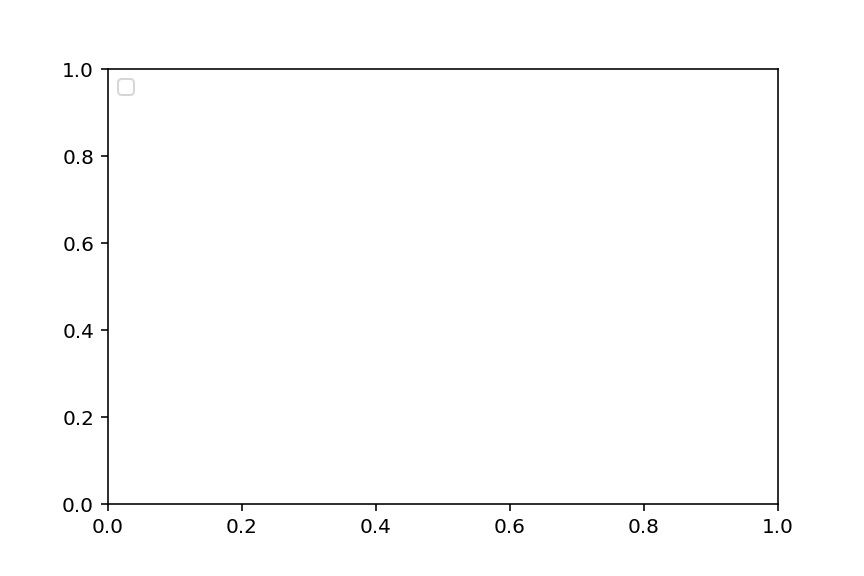

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


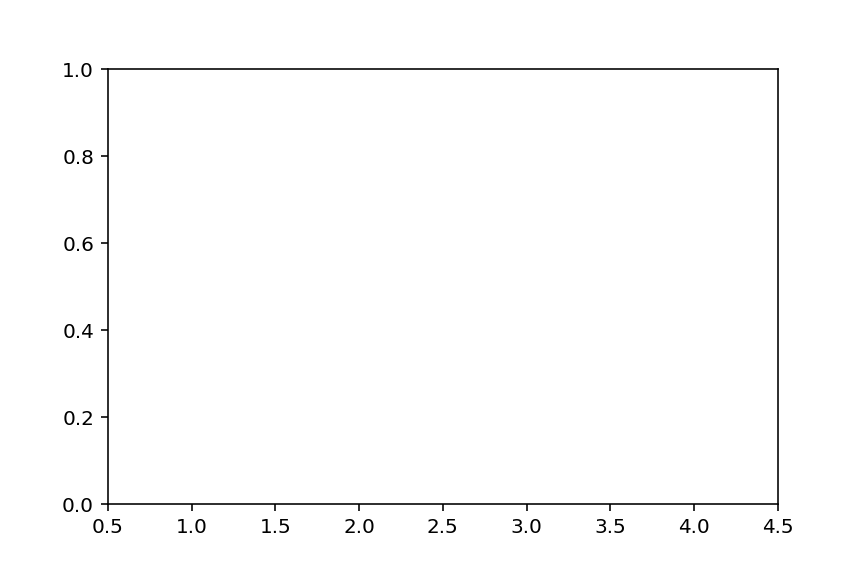

In [26]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


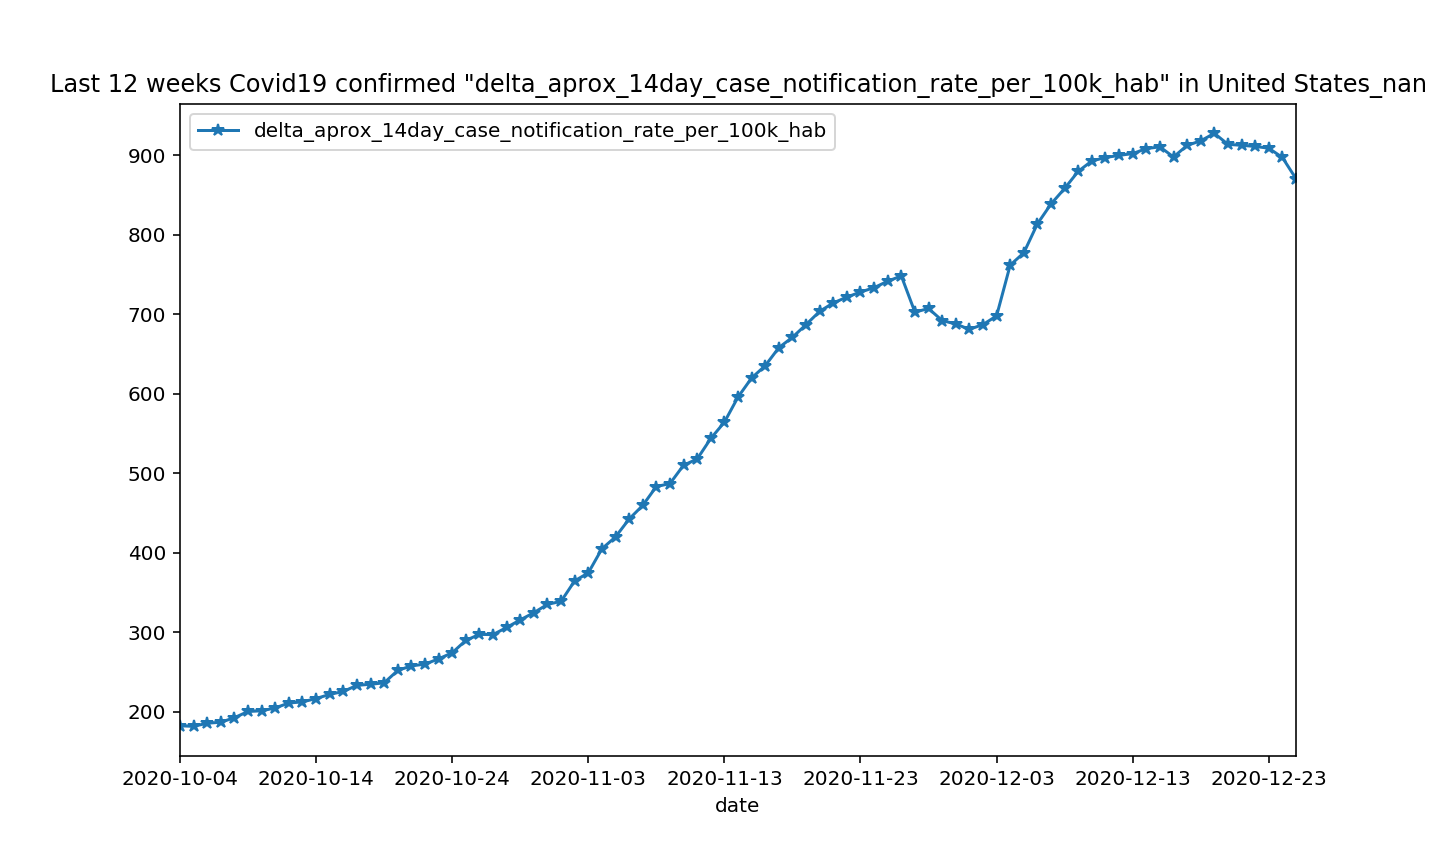

In [28]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


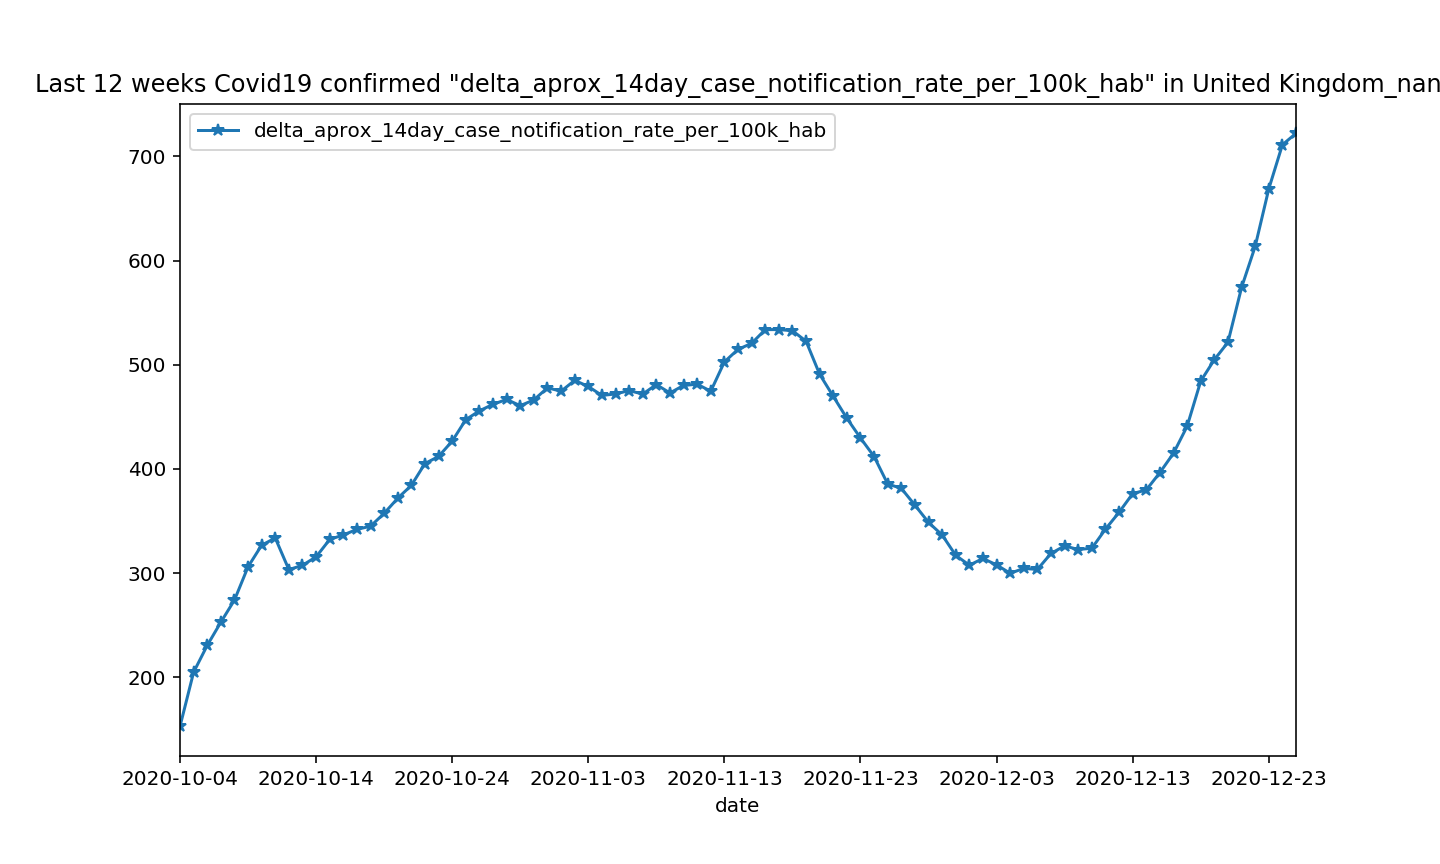

In [29]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


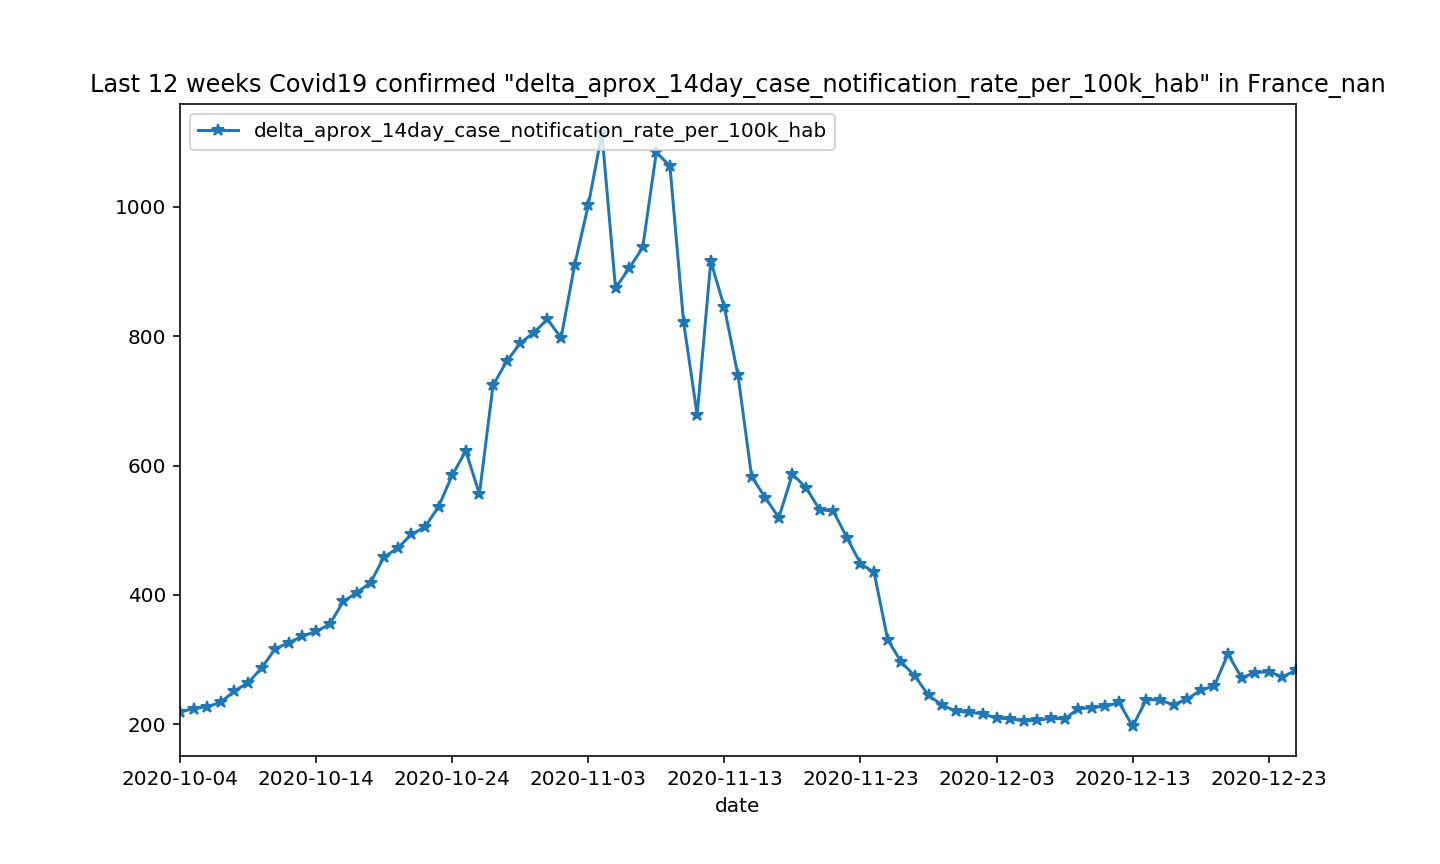

In [30]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


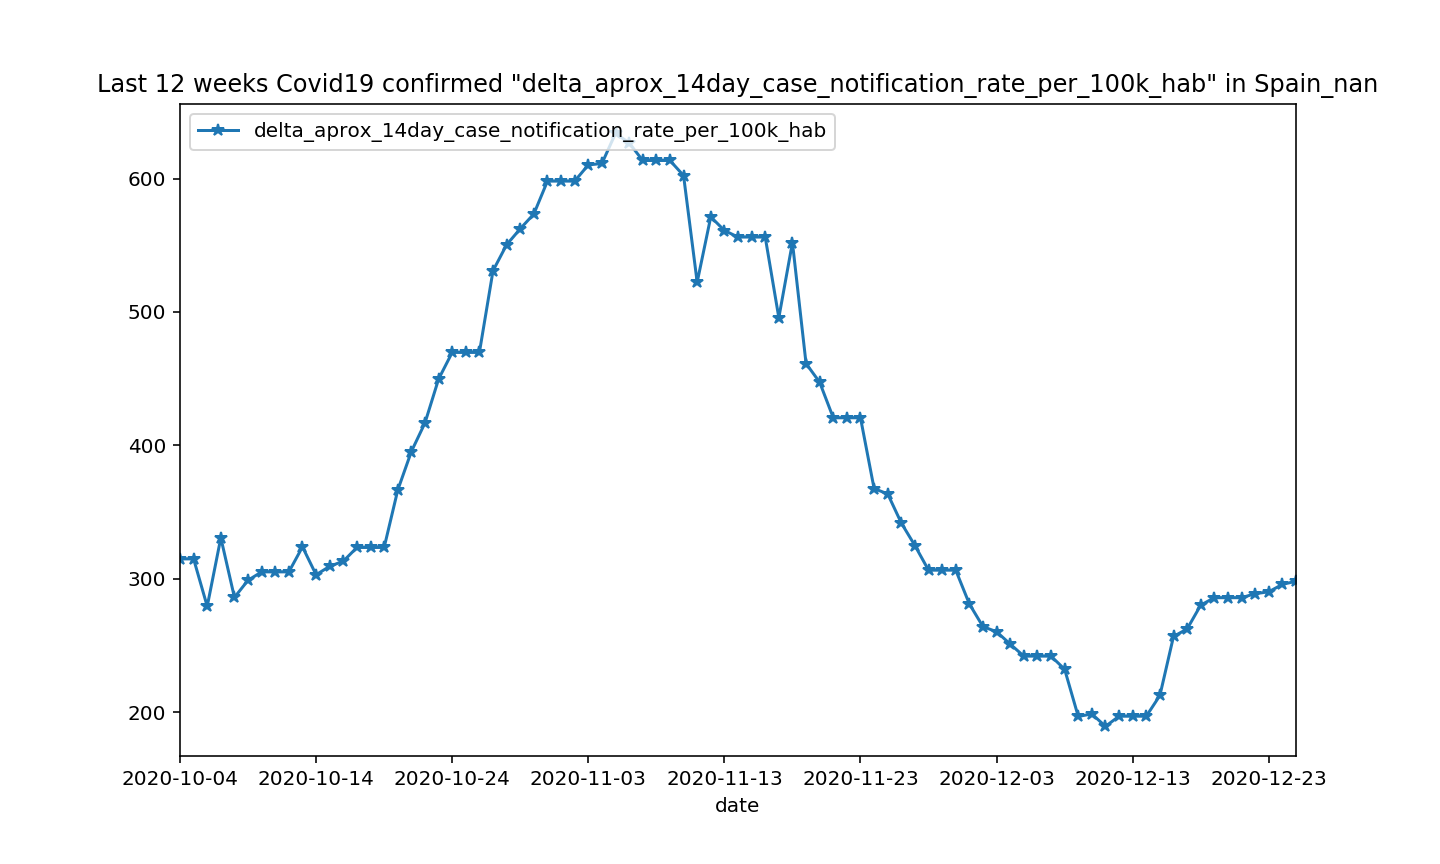

In [31]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


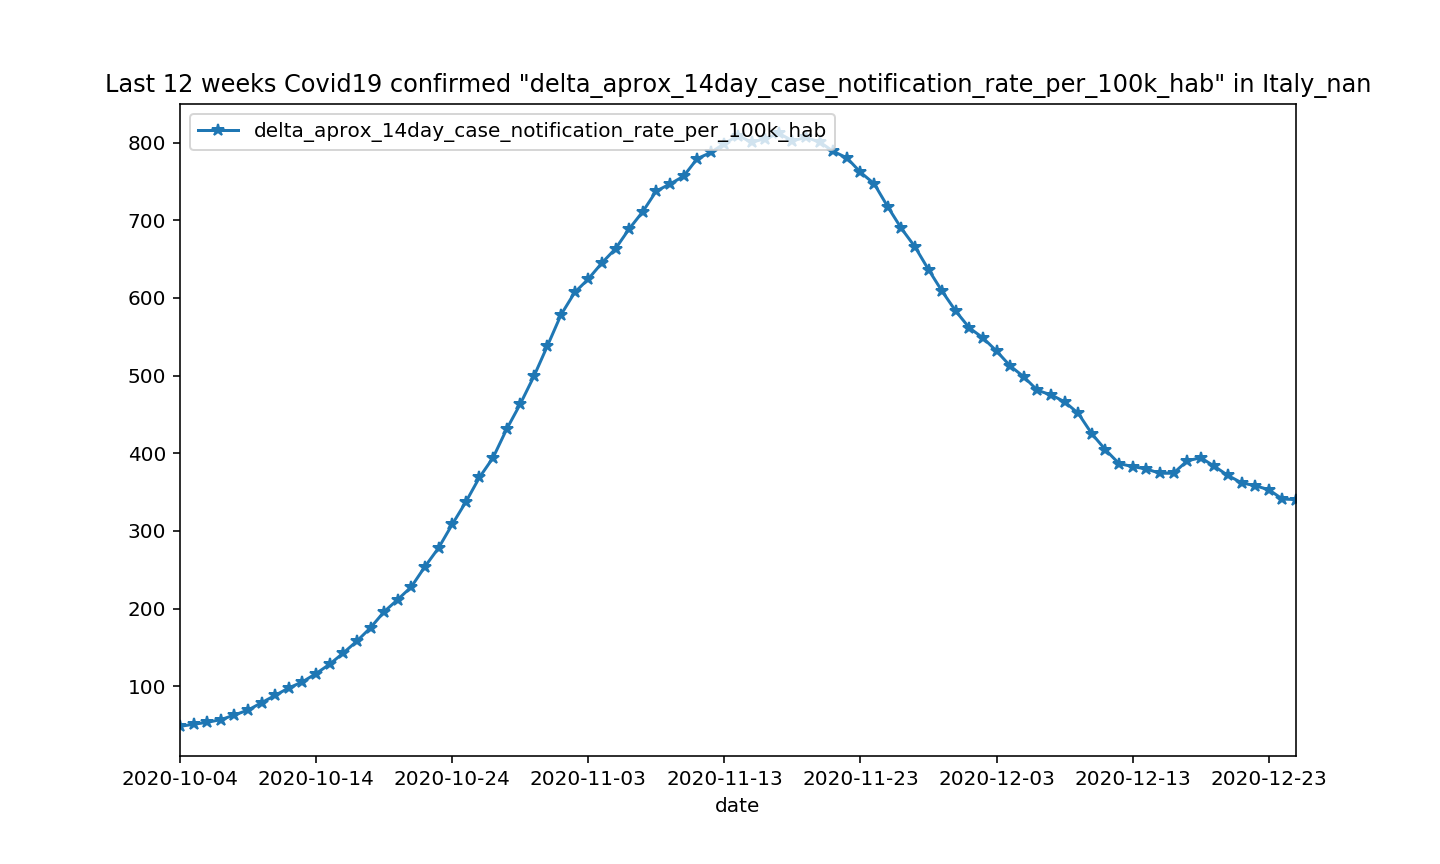

In [32]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


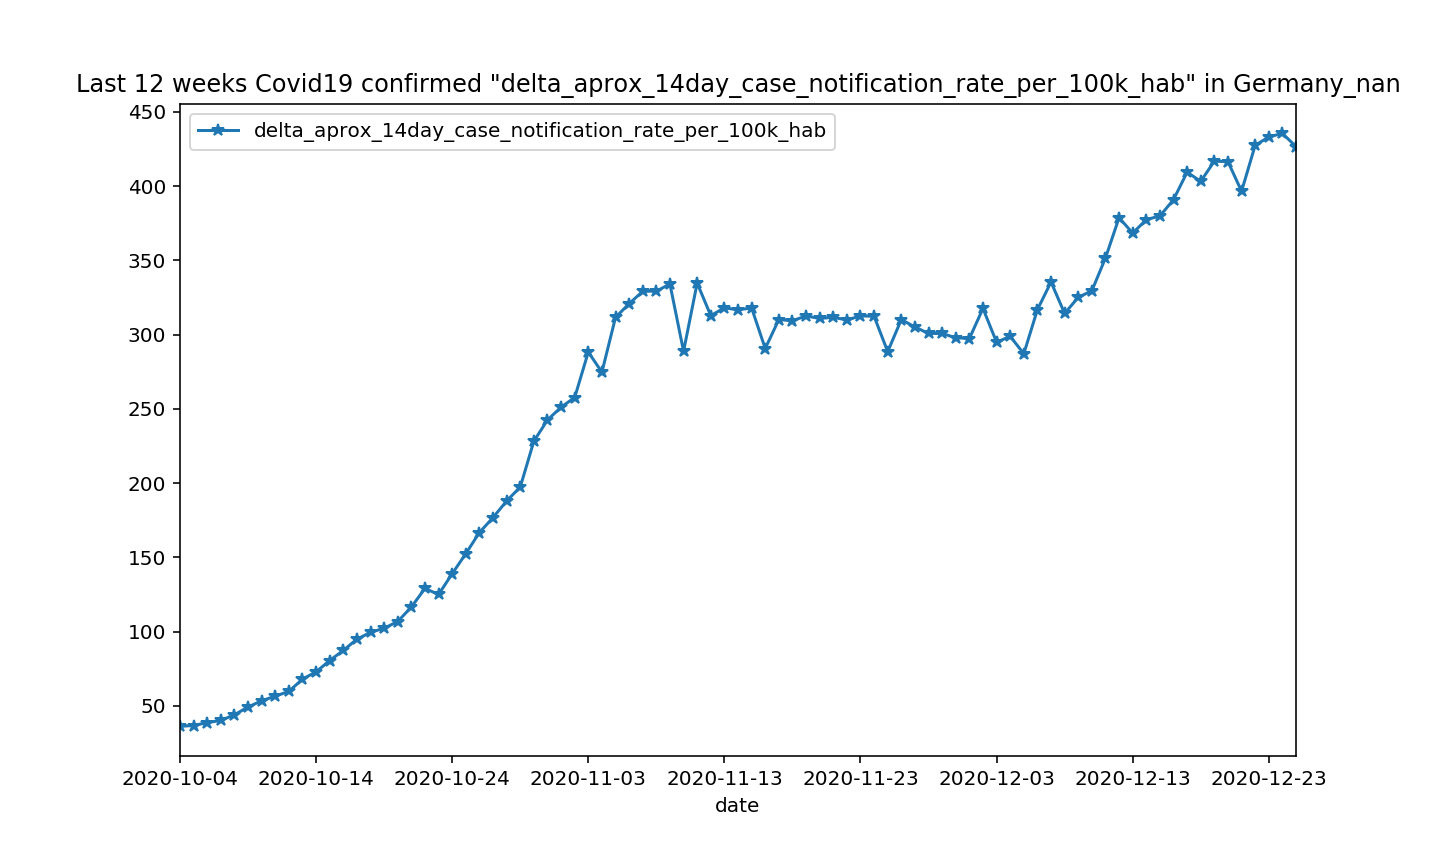

In [33]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


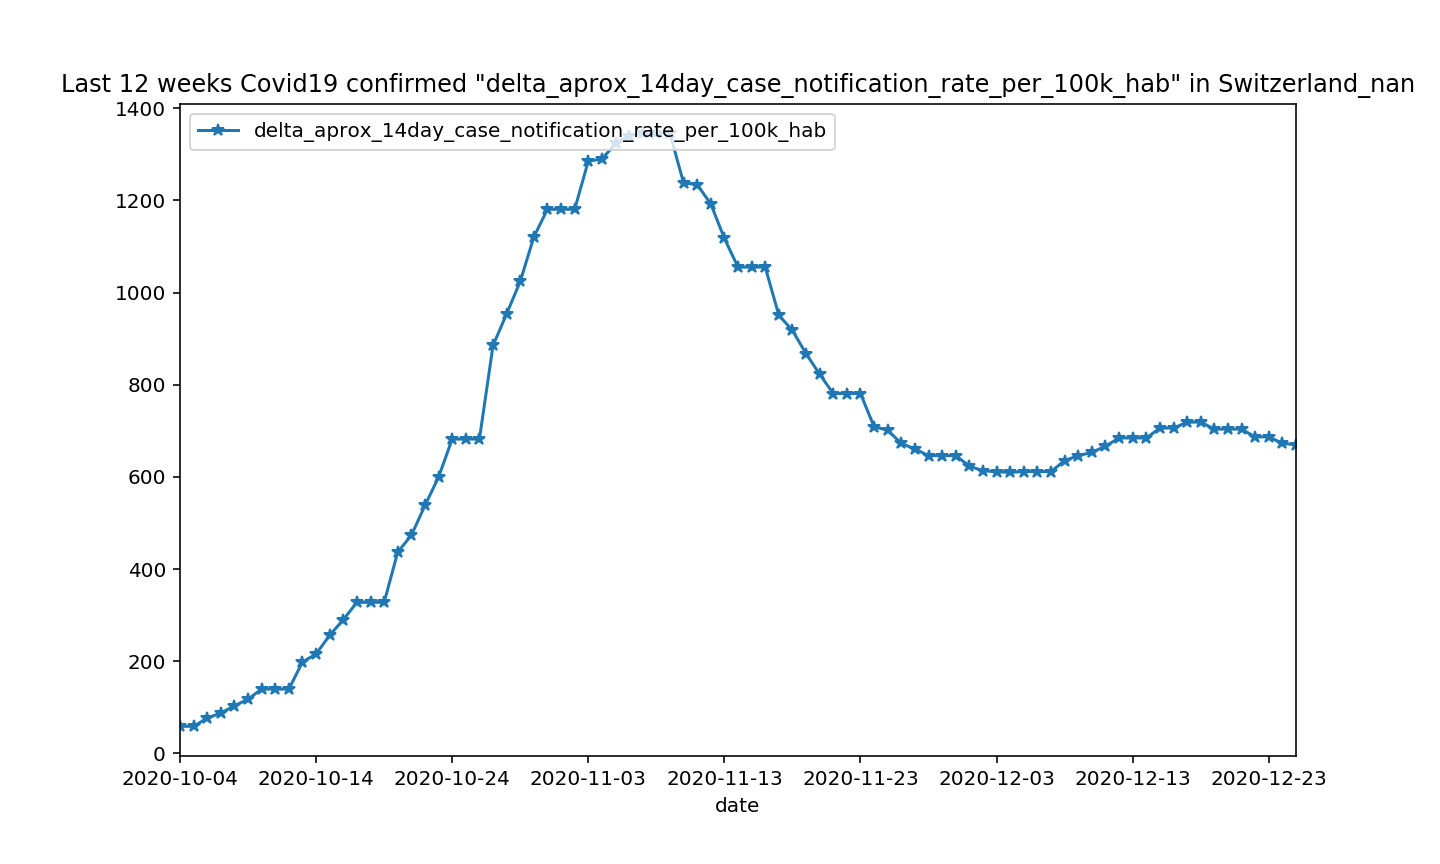

In [34]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


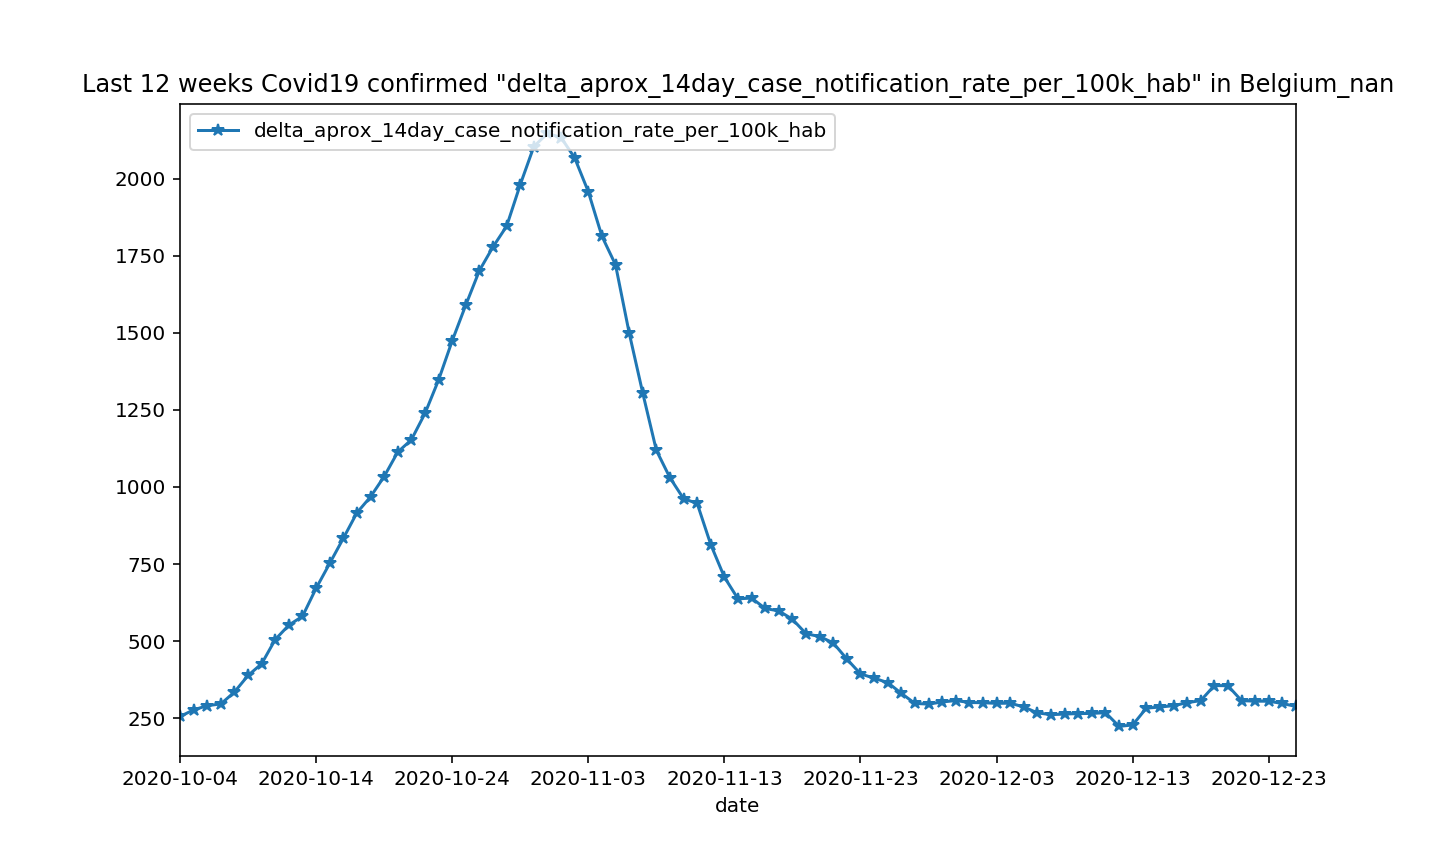

In [35]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


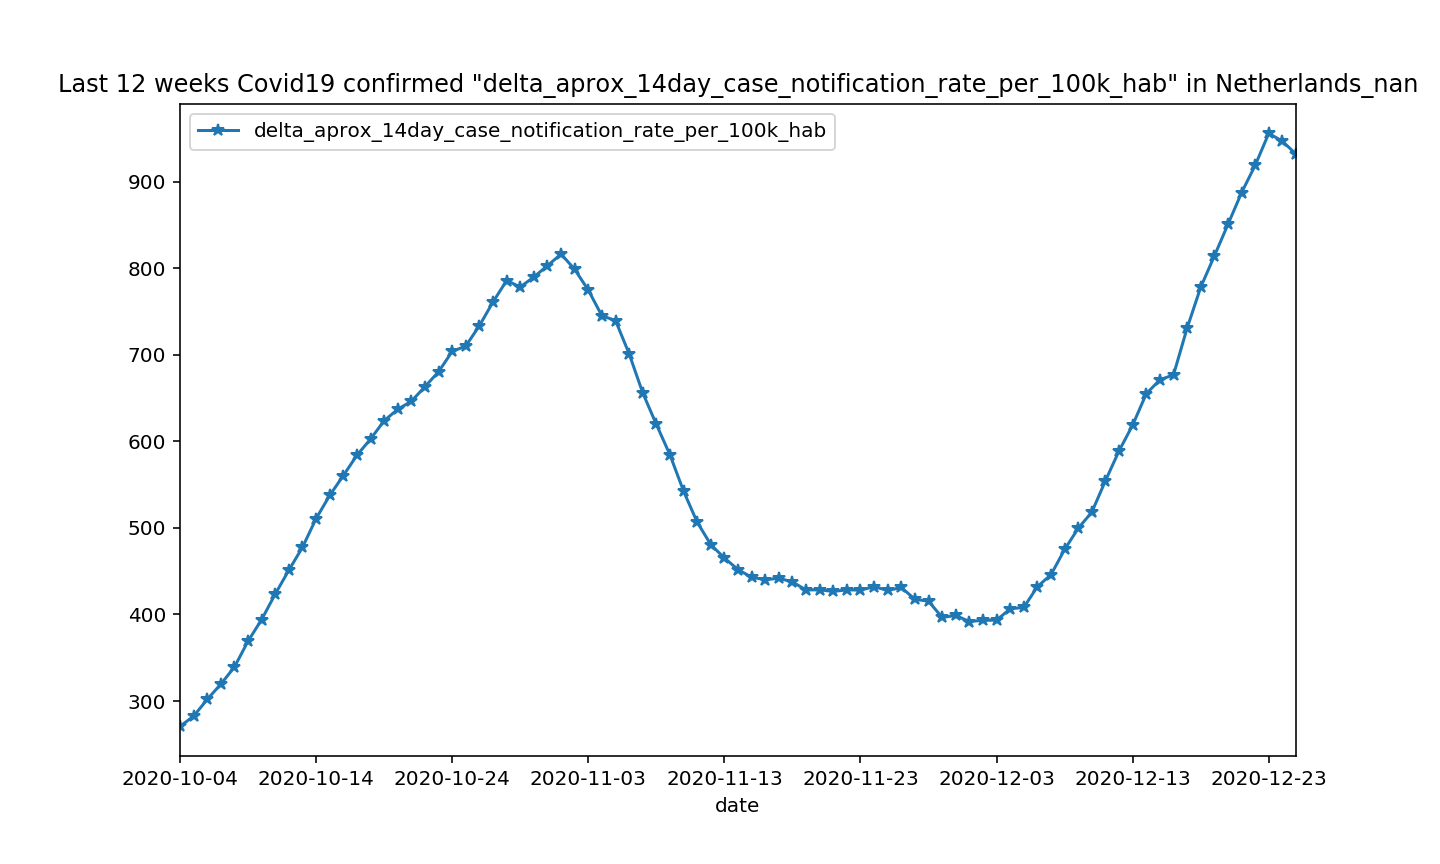

In [36]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


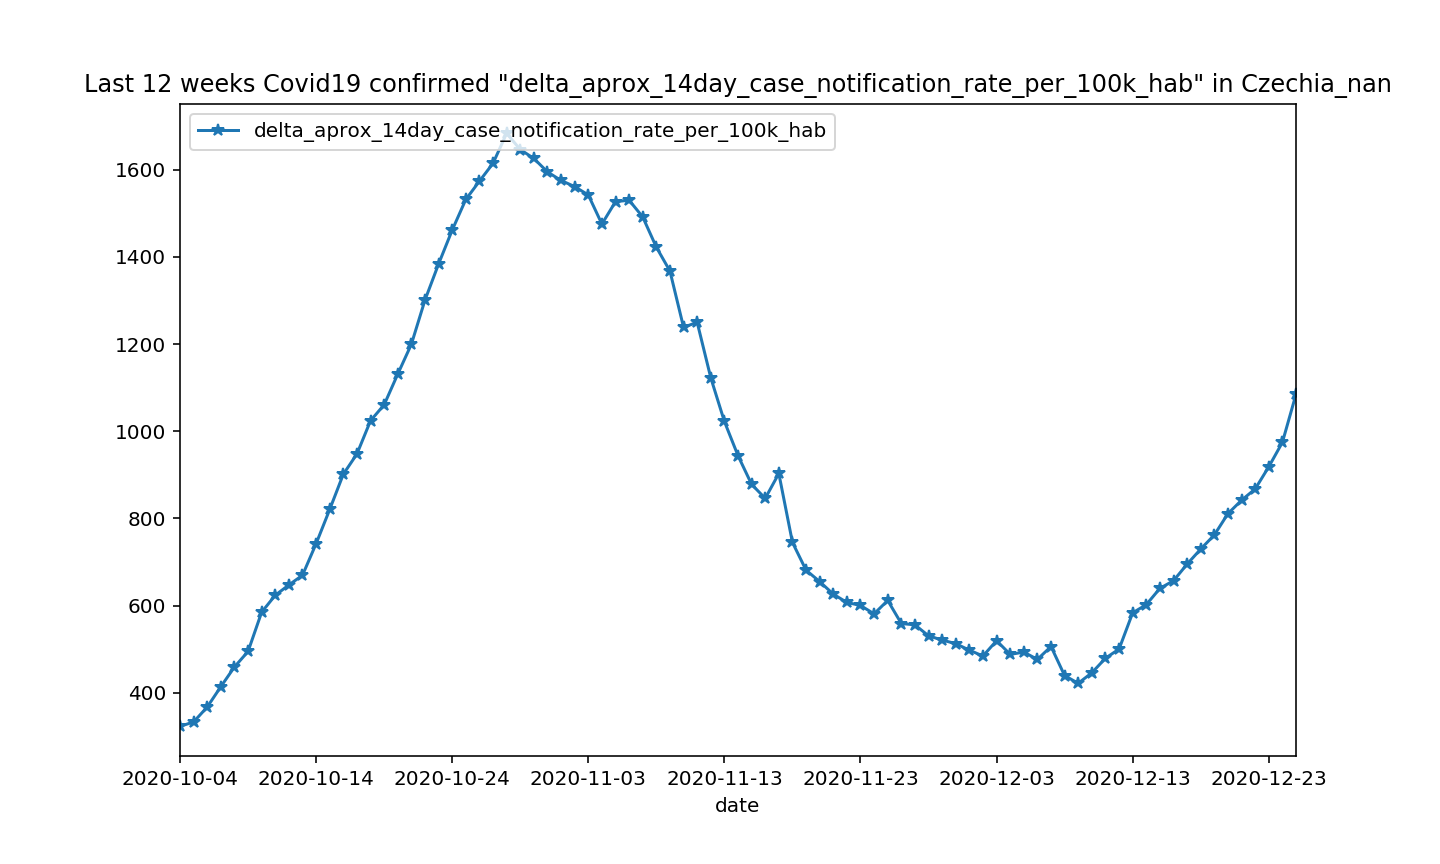

In [37]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


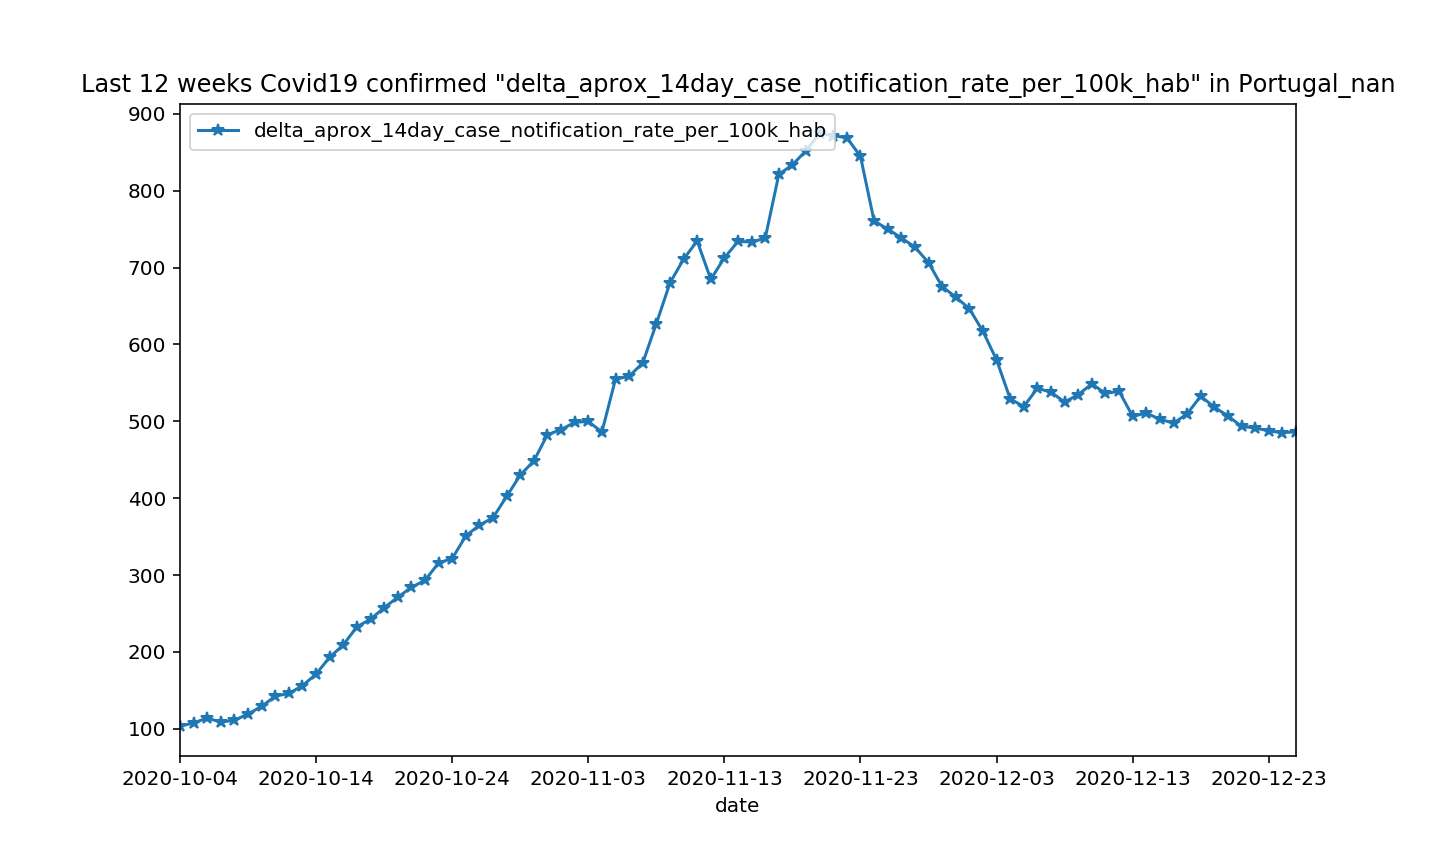

In [38]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [39]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


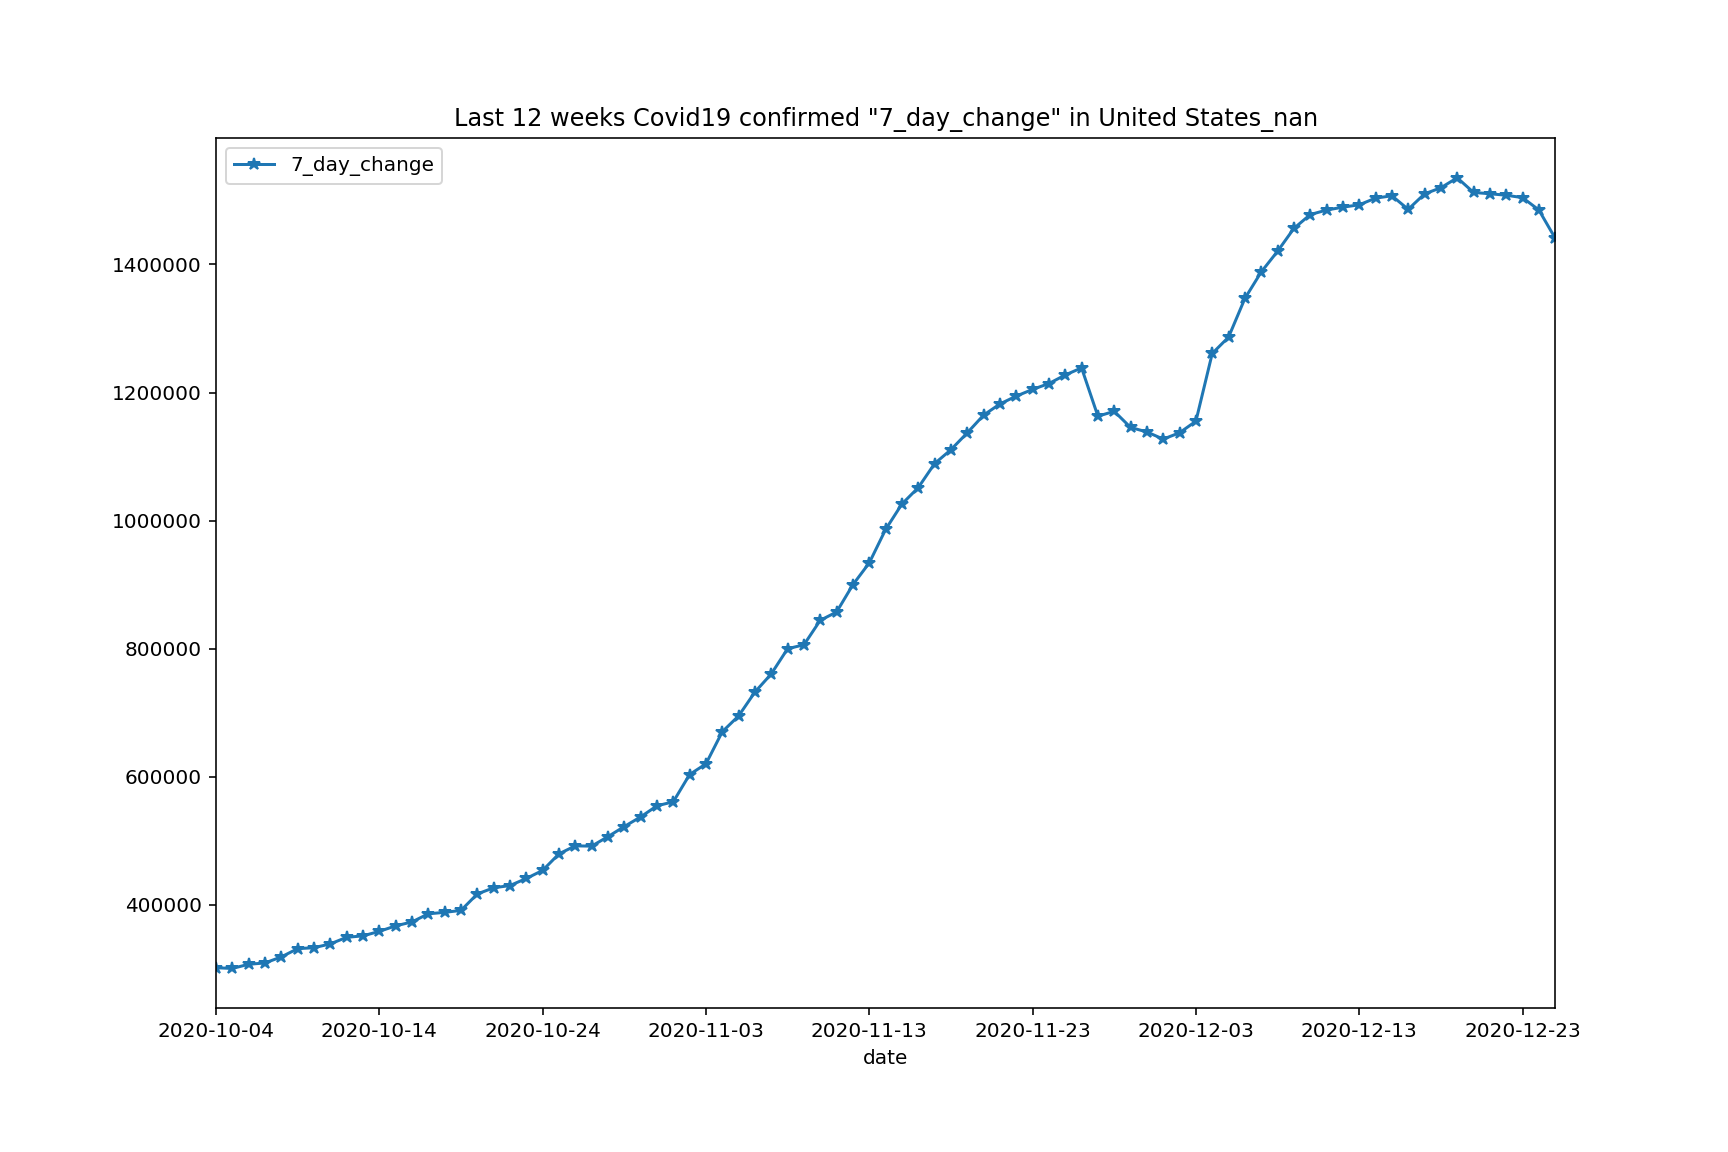

In [40]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


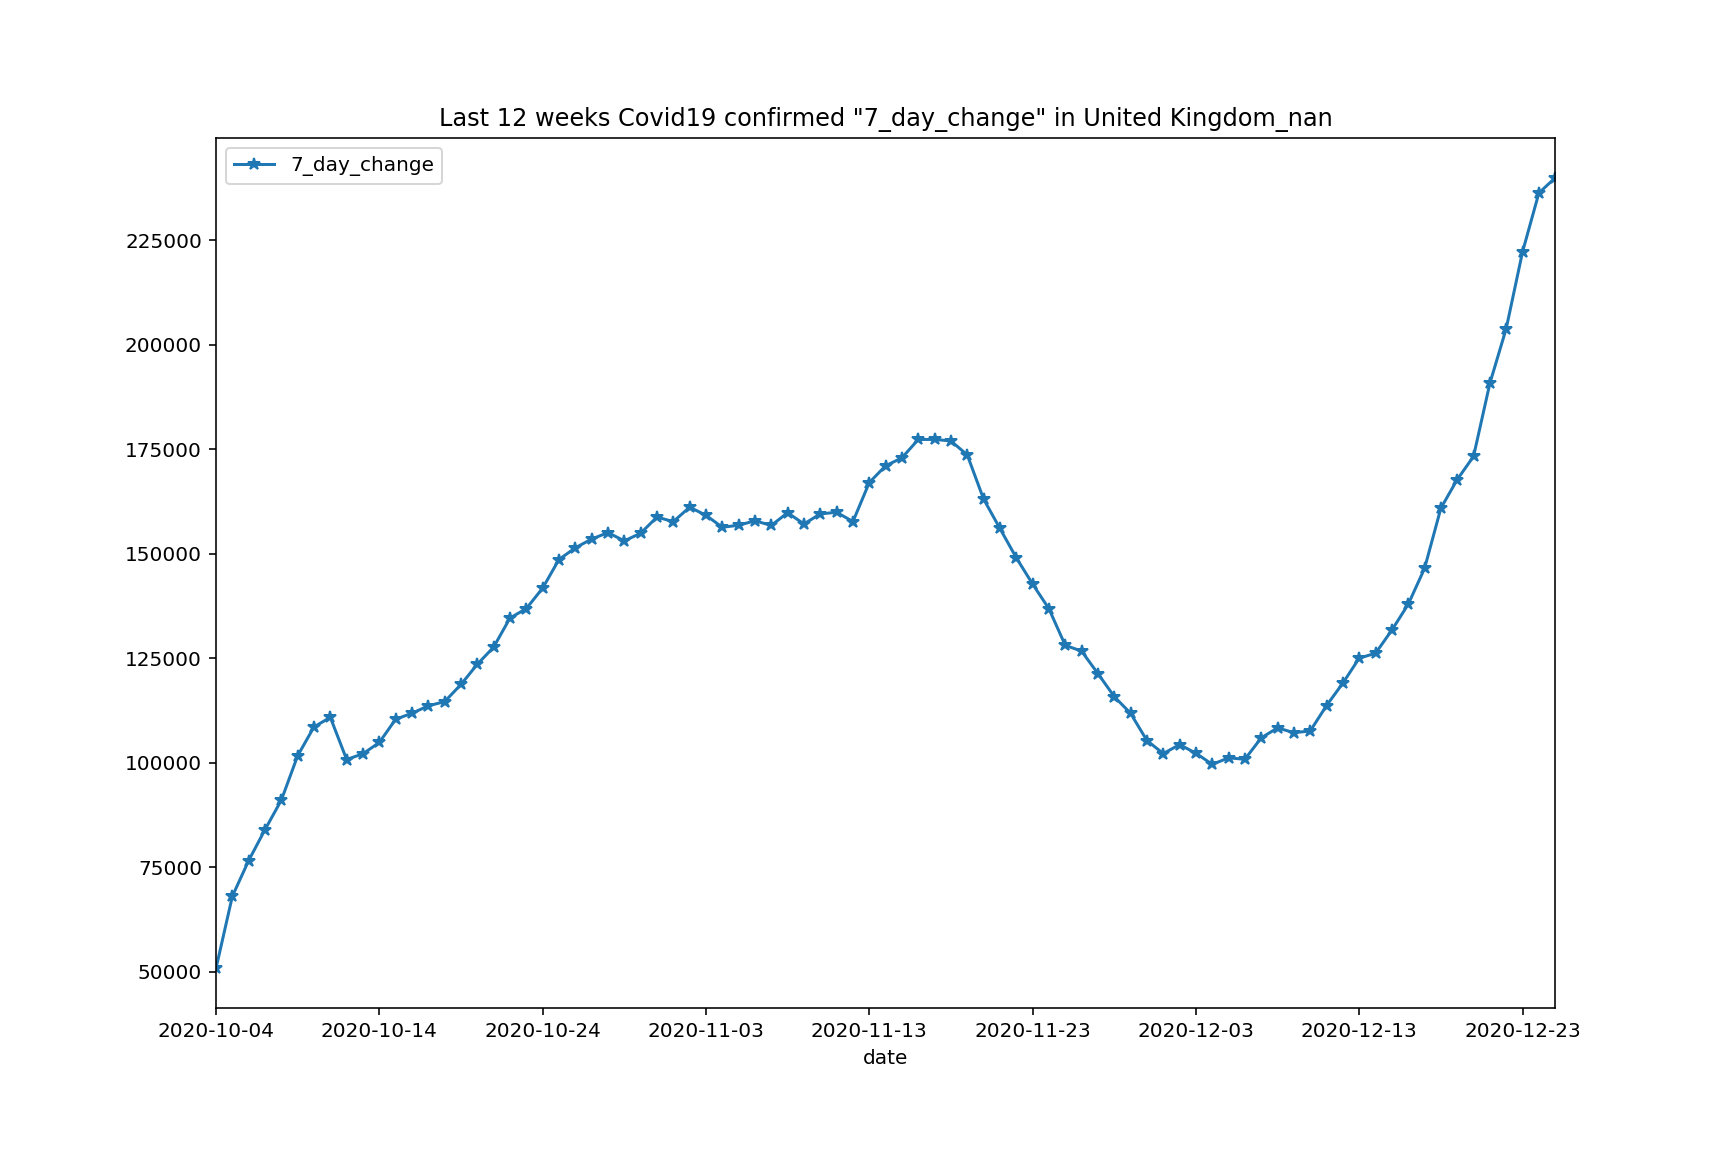

In [41]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


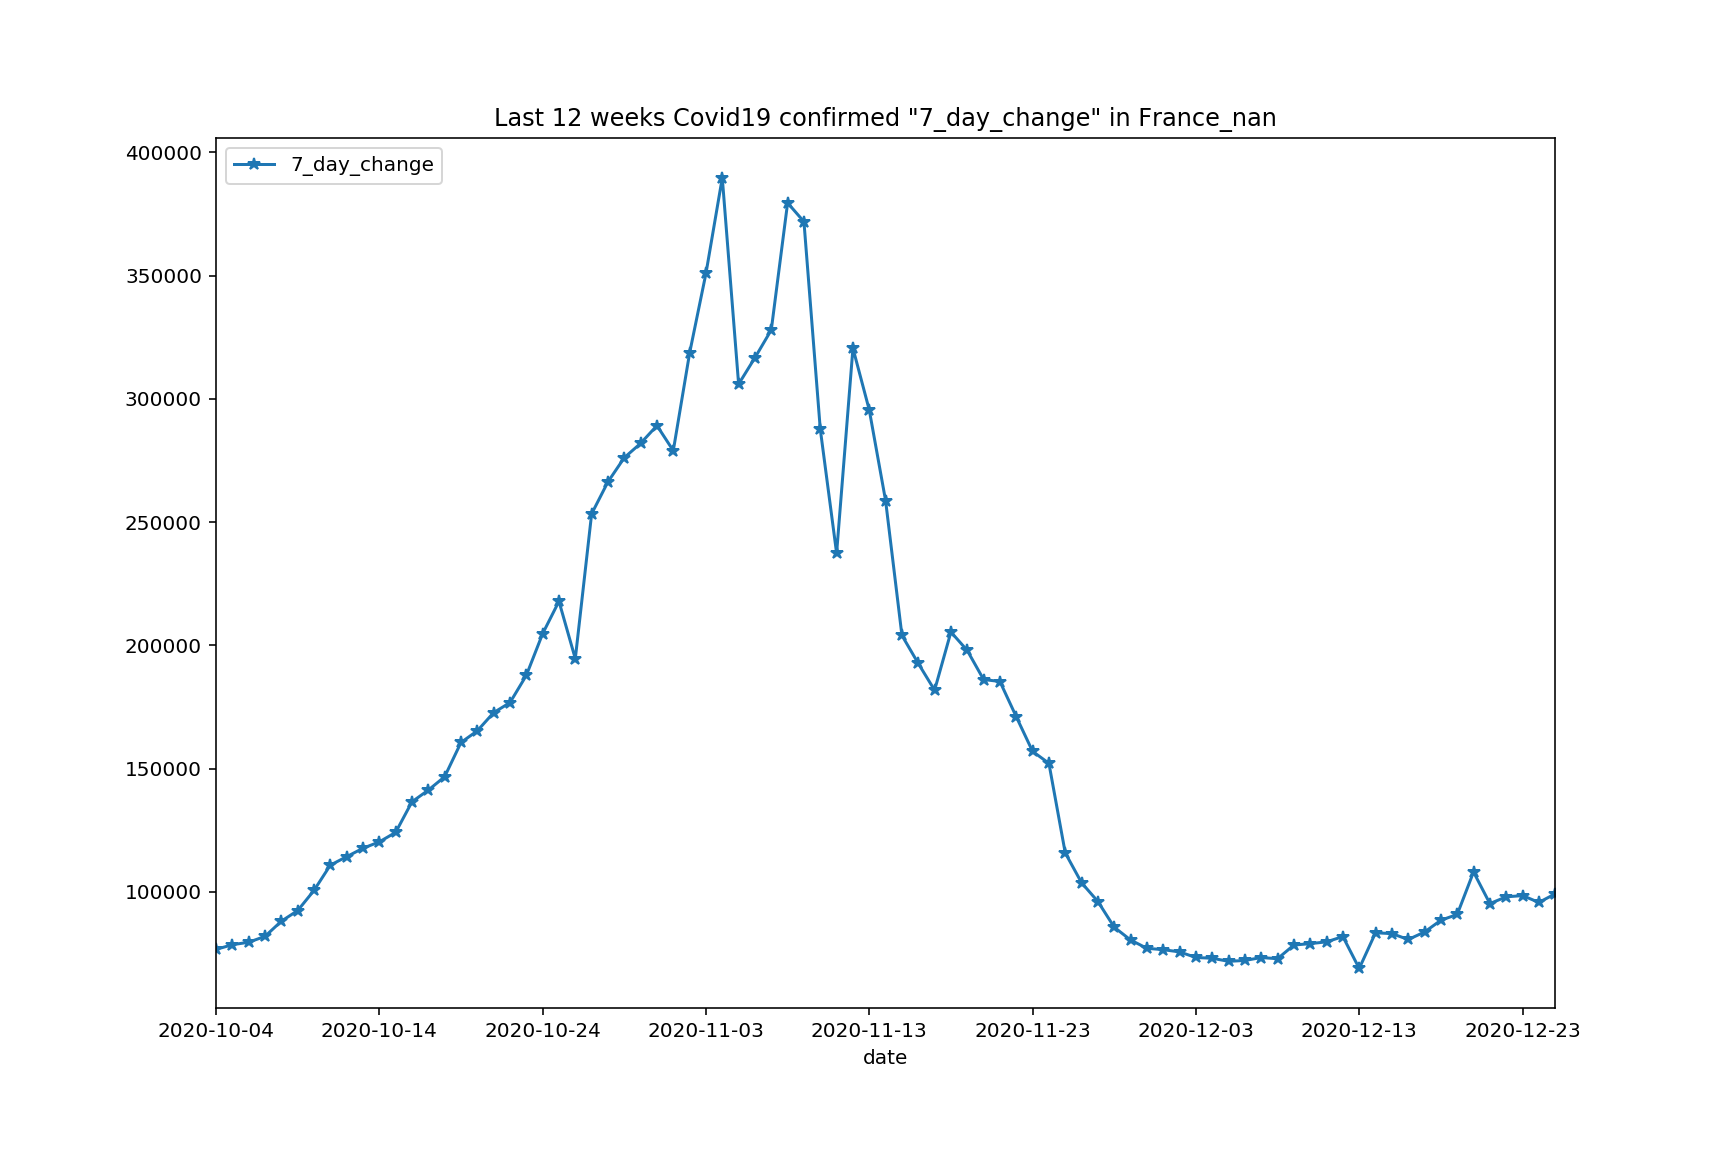

In [42]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


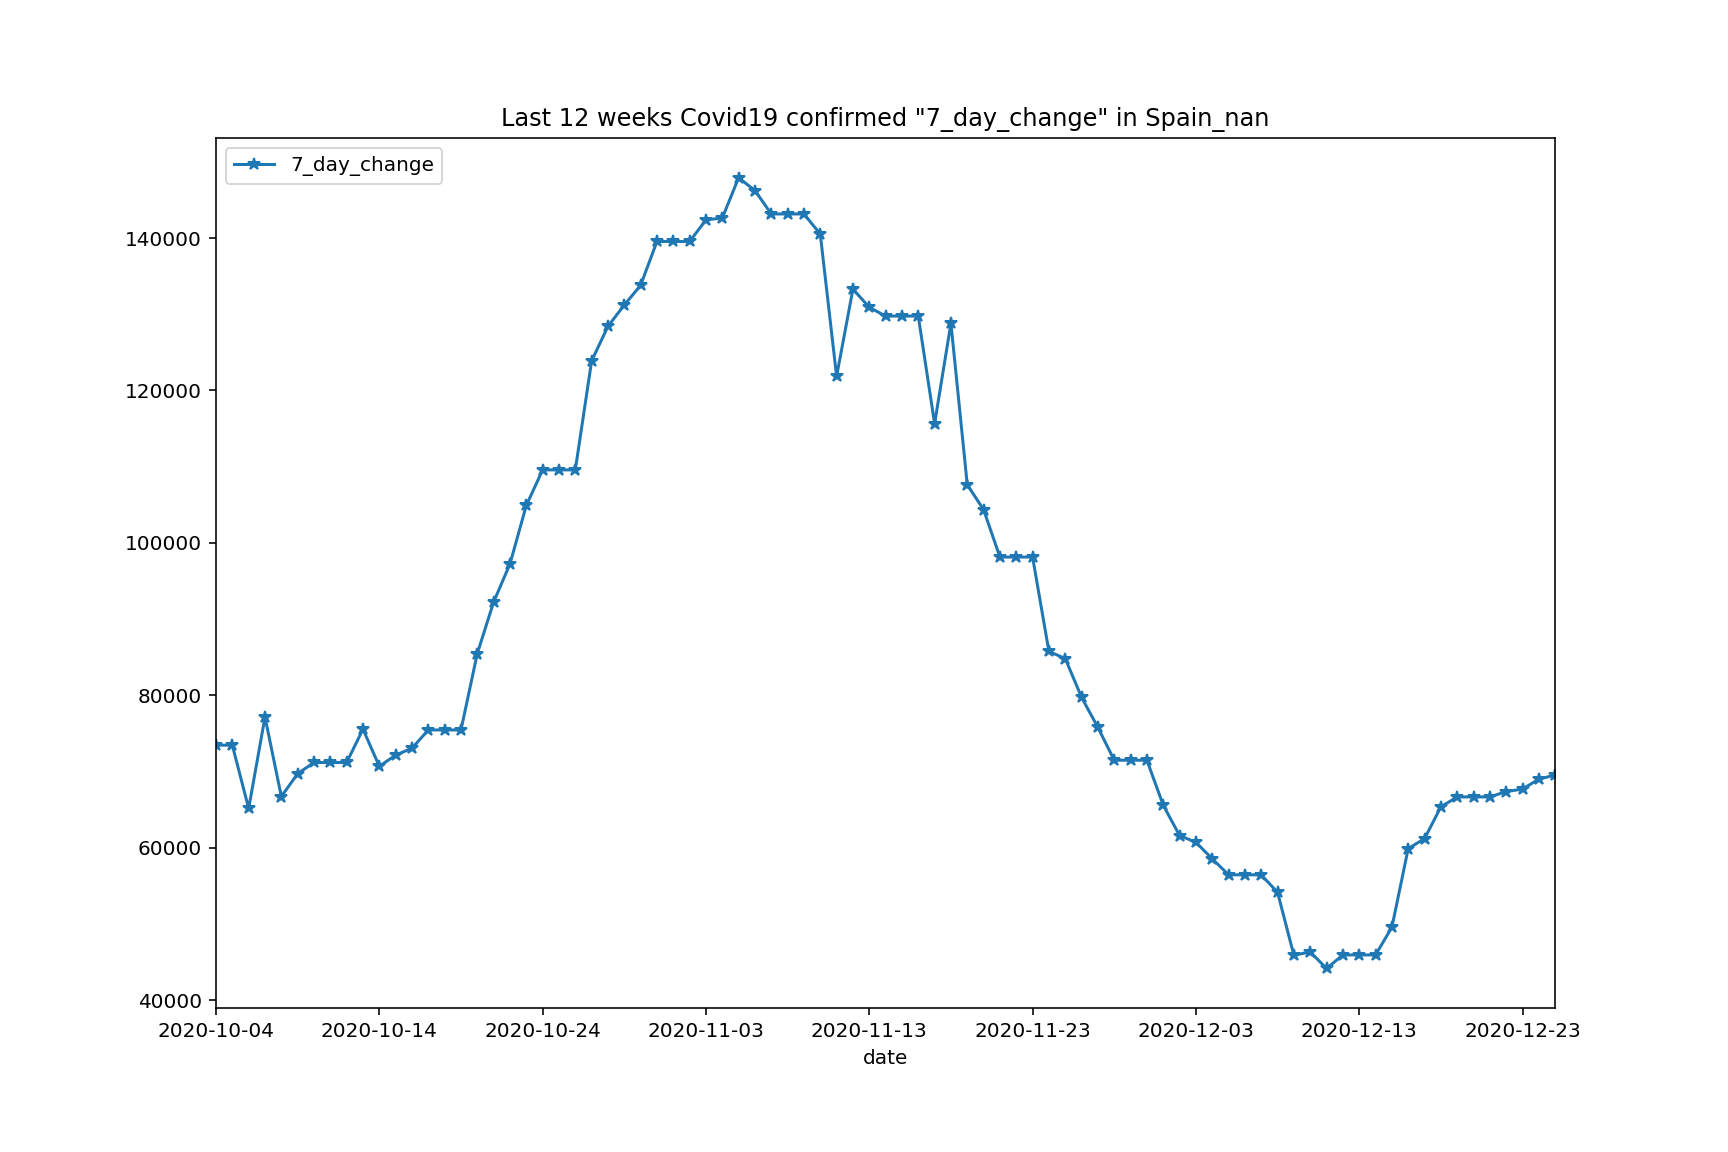

In [43]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


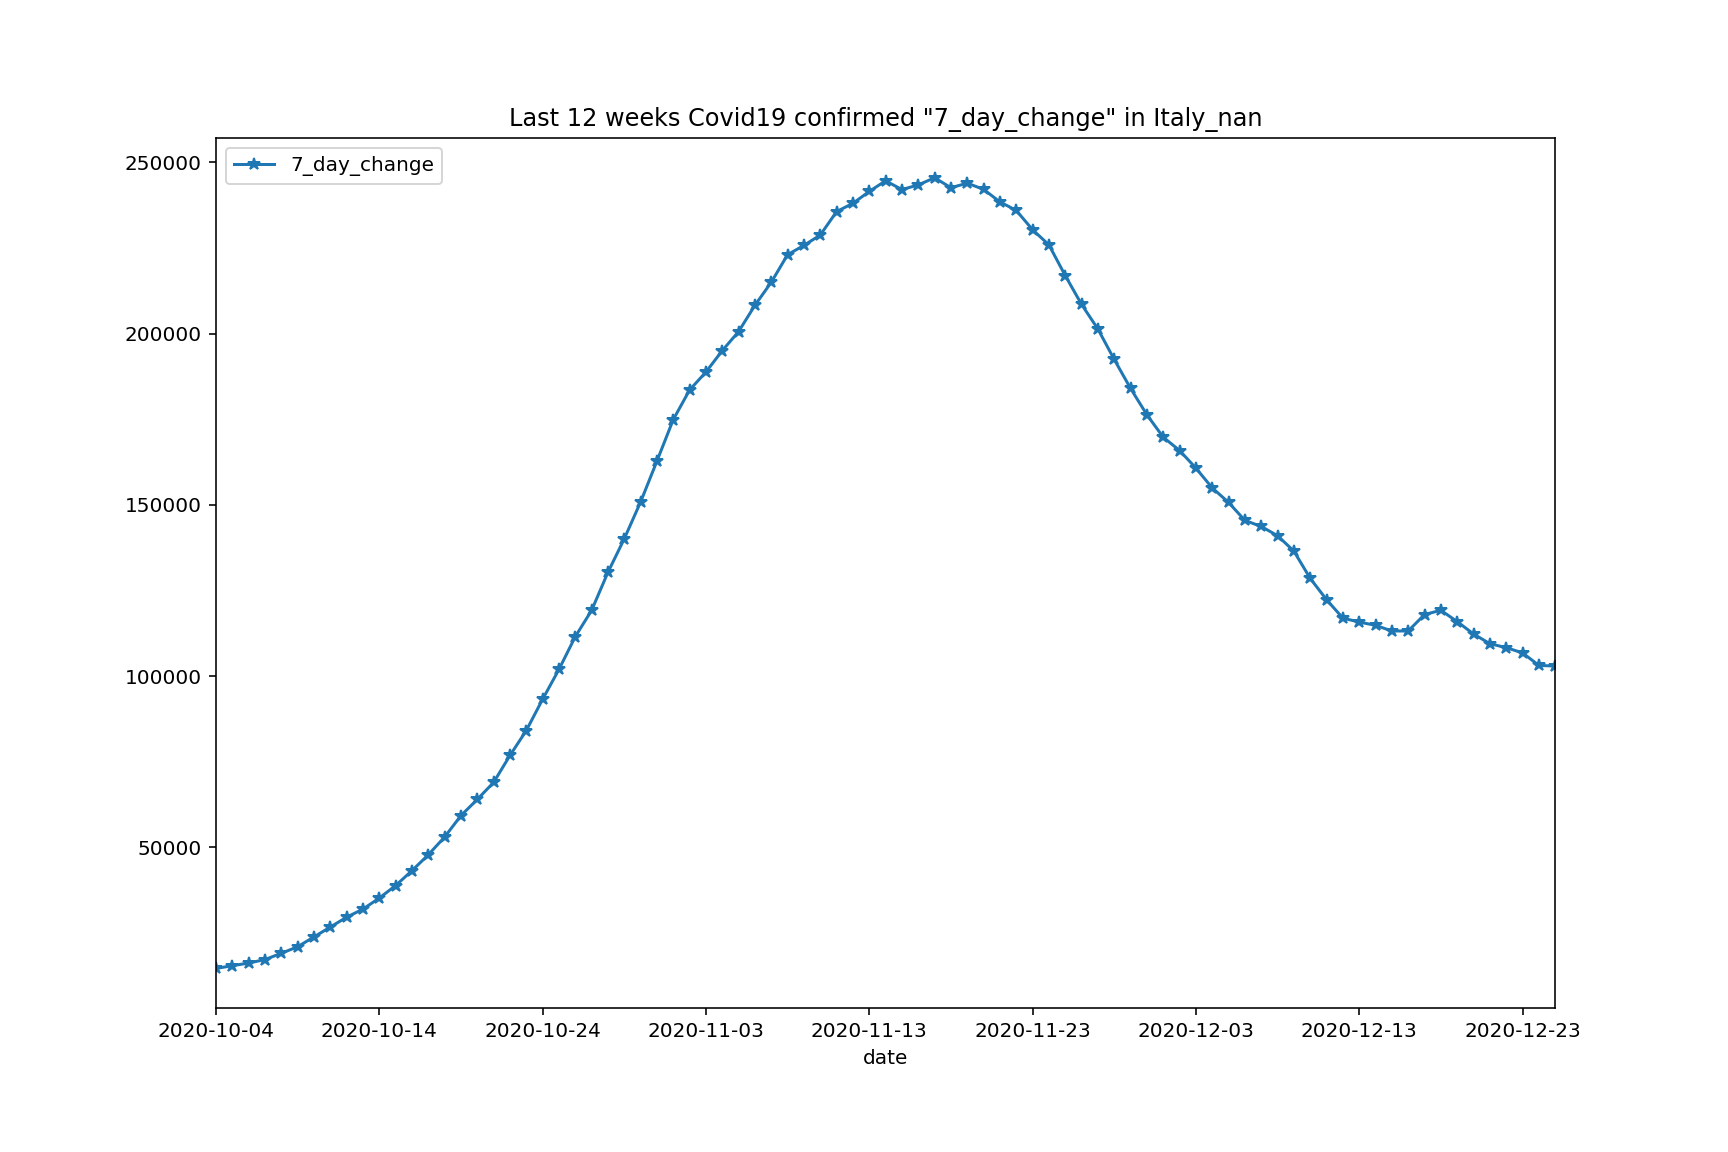

In [44]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


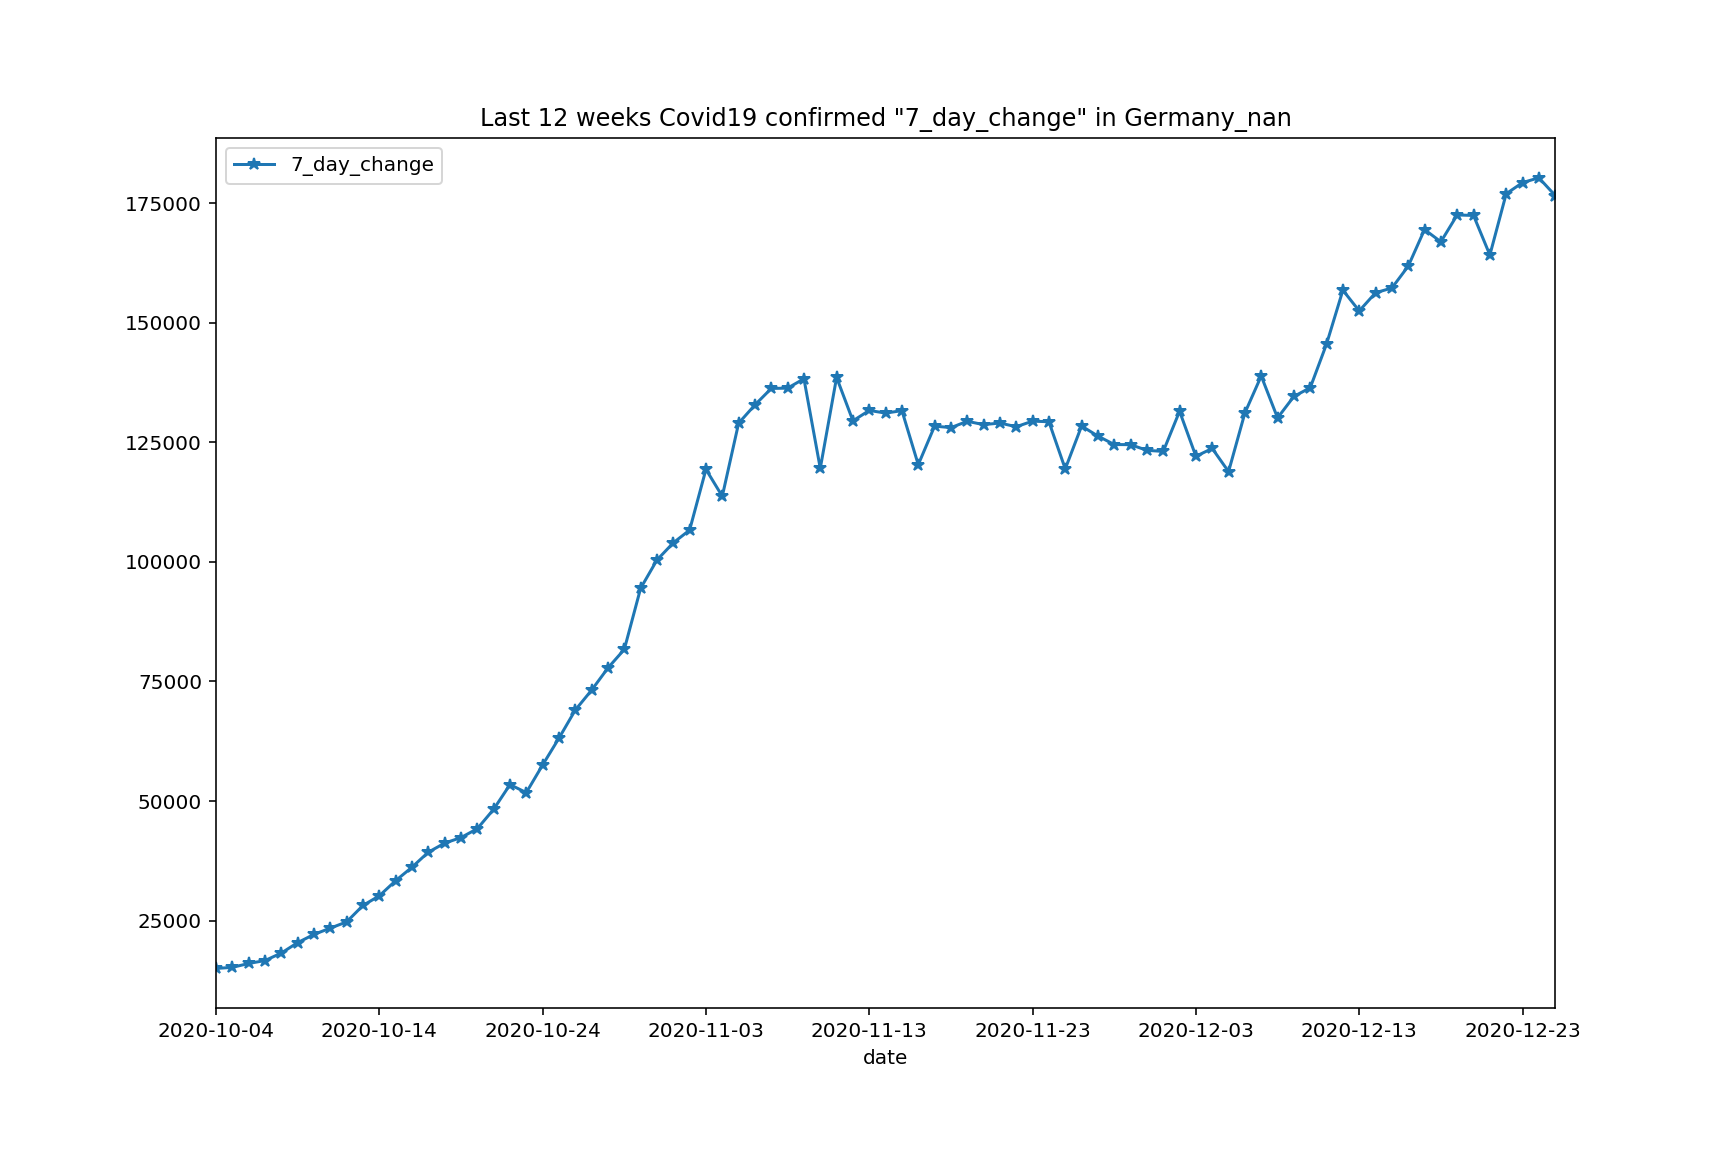

In [45]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


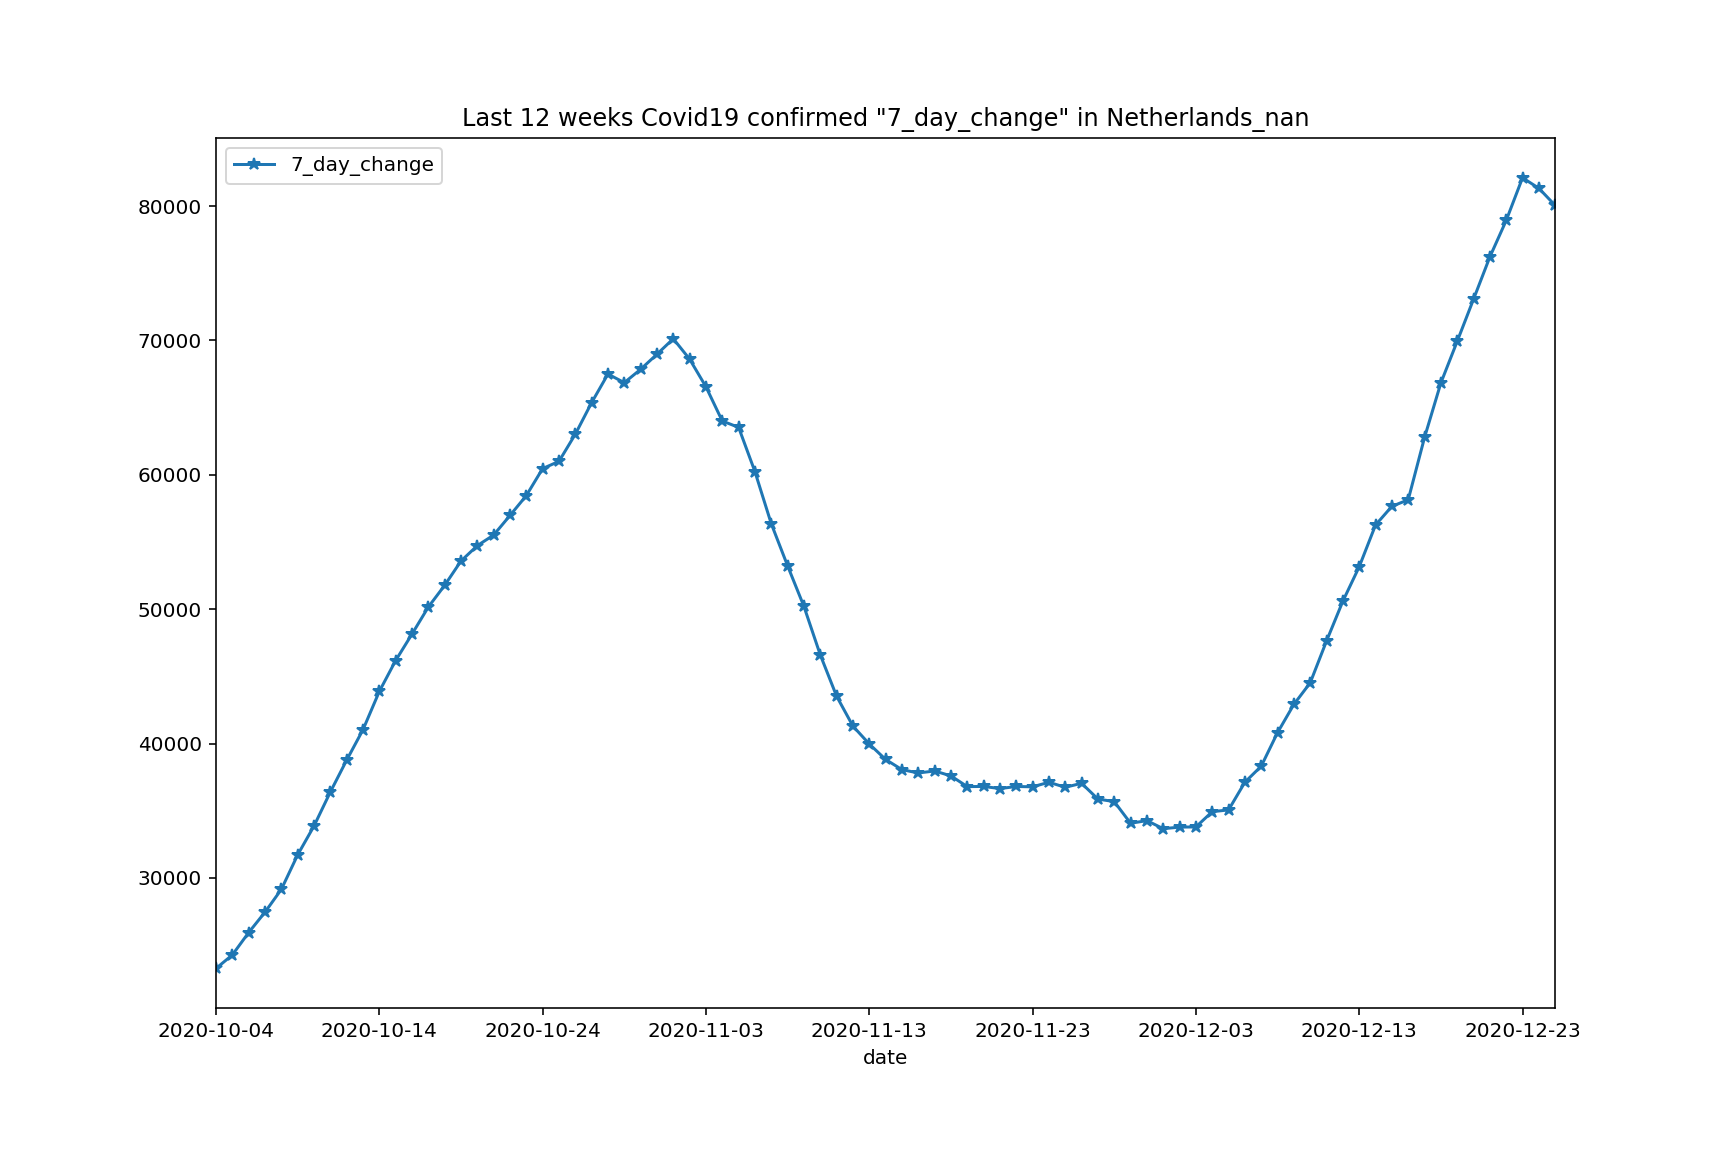

In [46]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


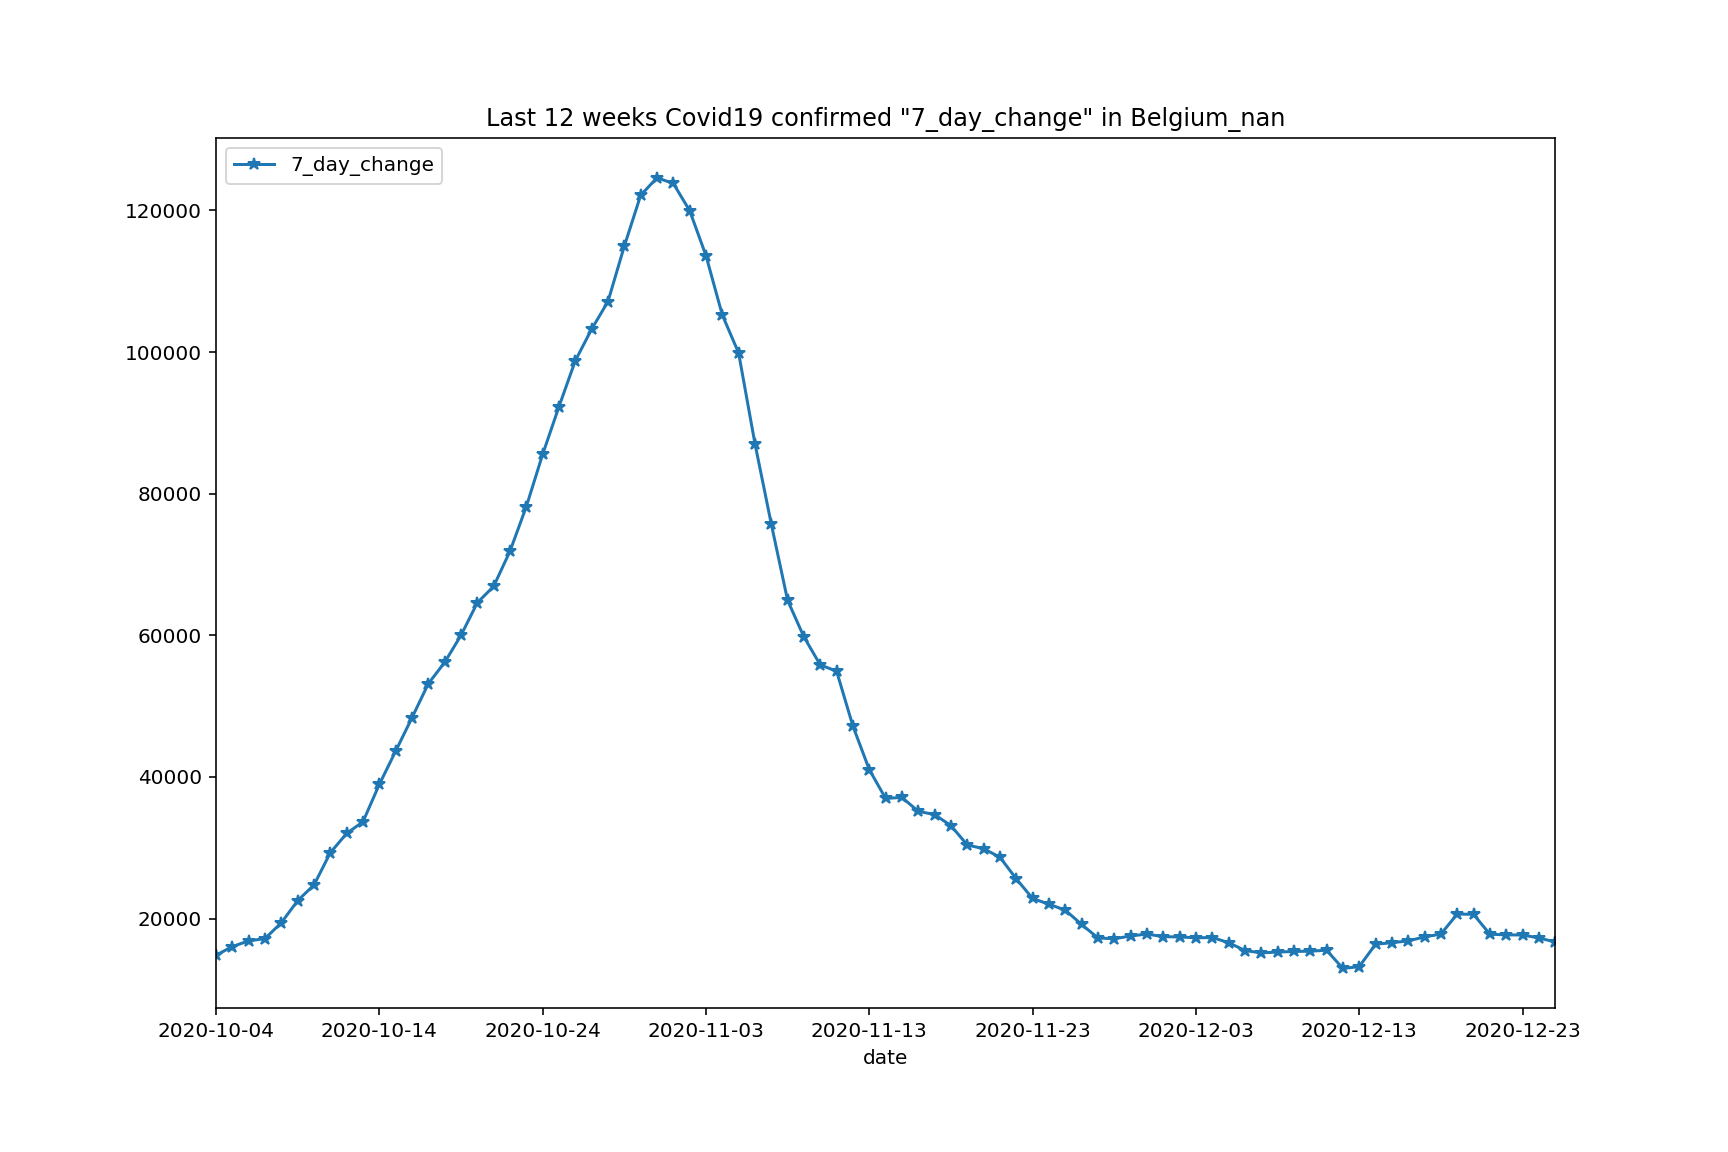

In [47]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


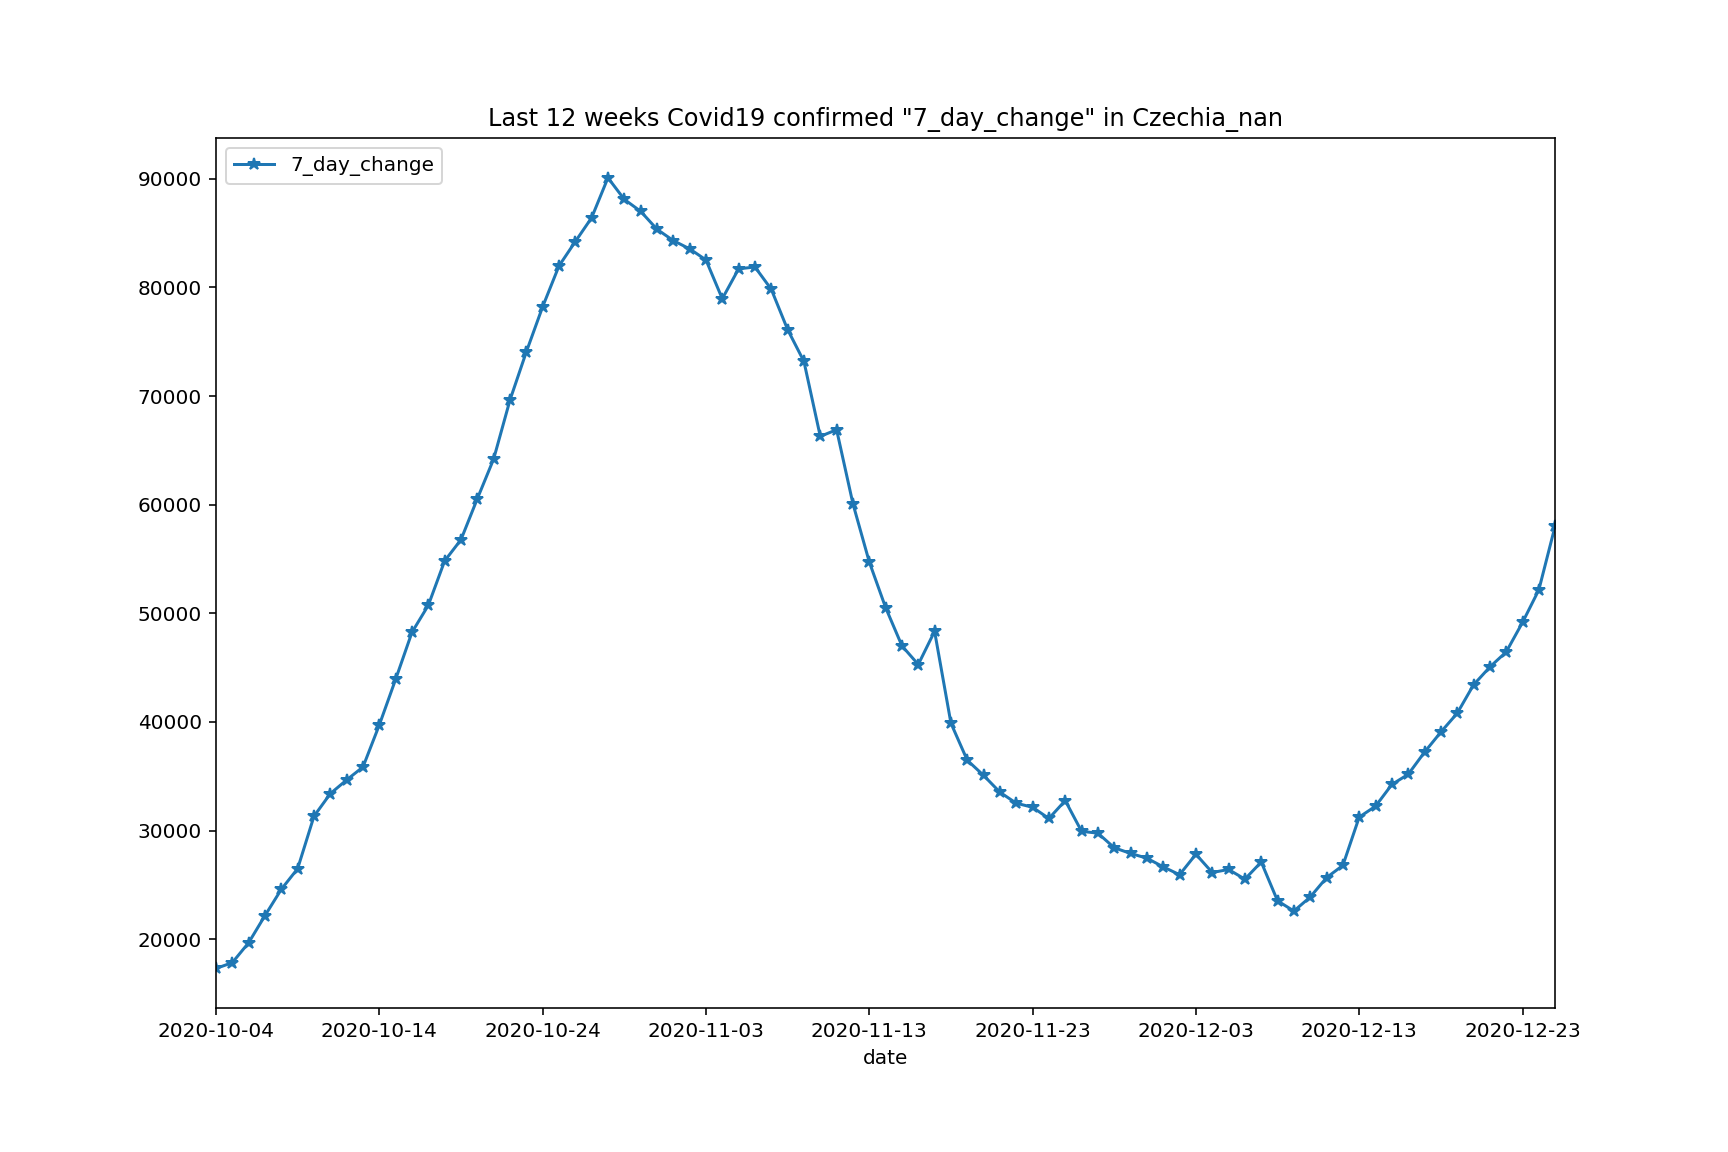

In [48]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


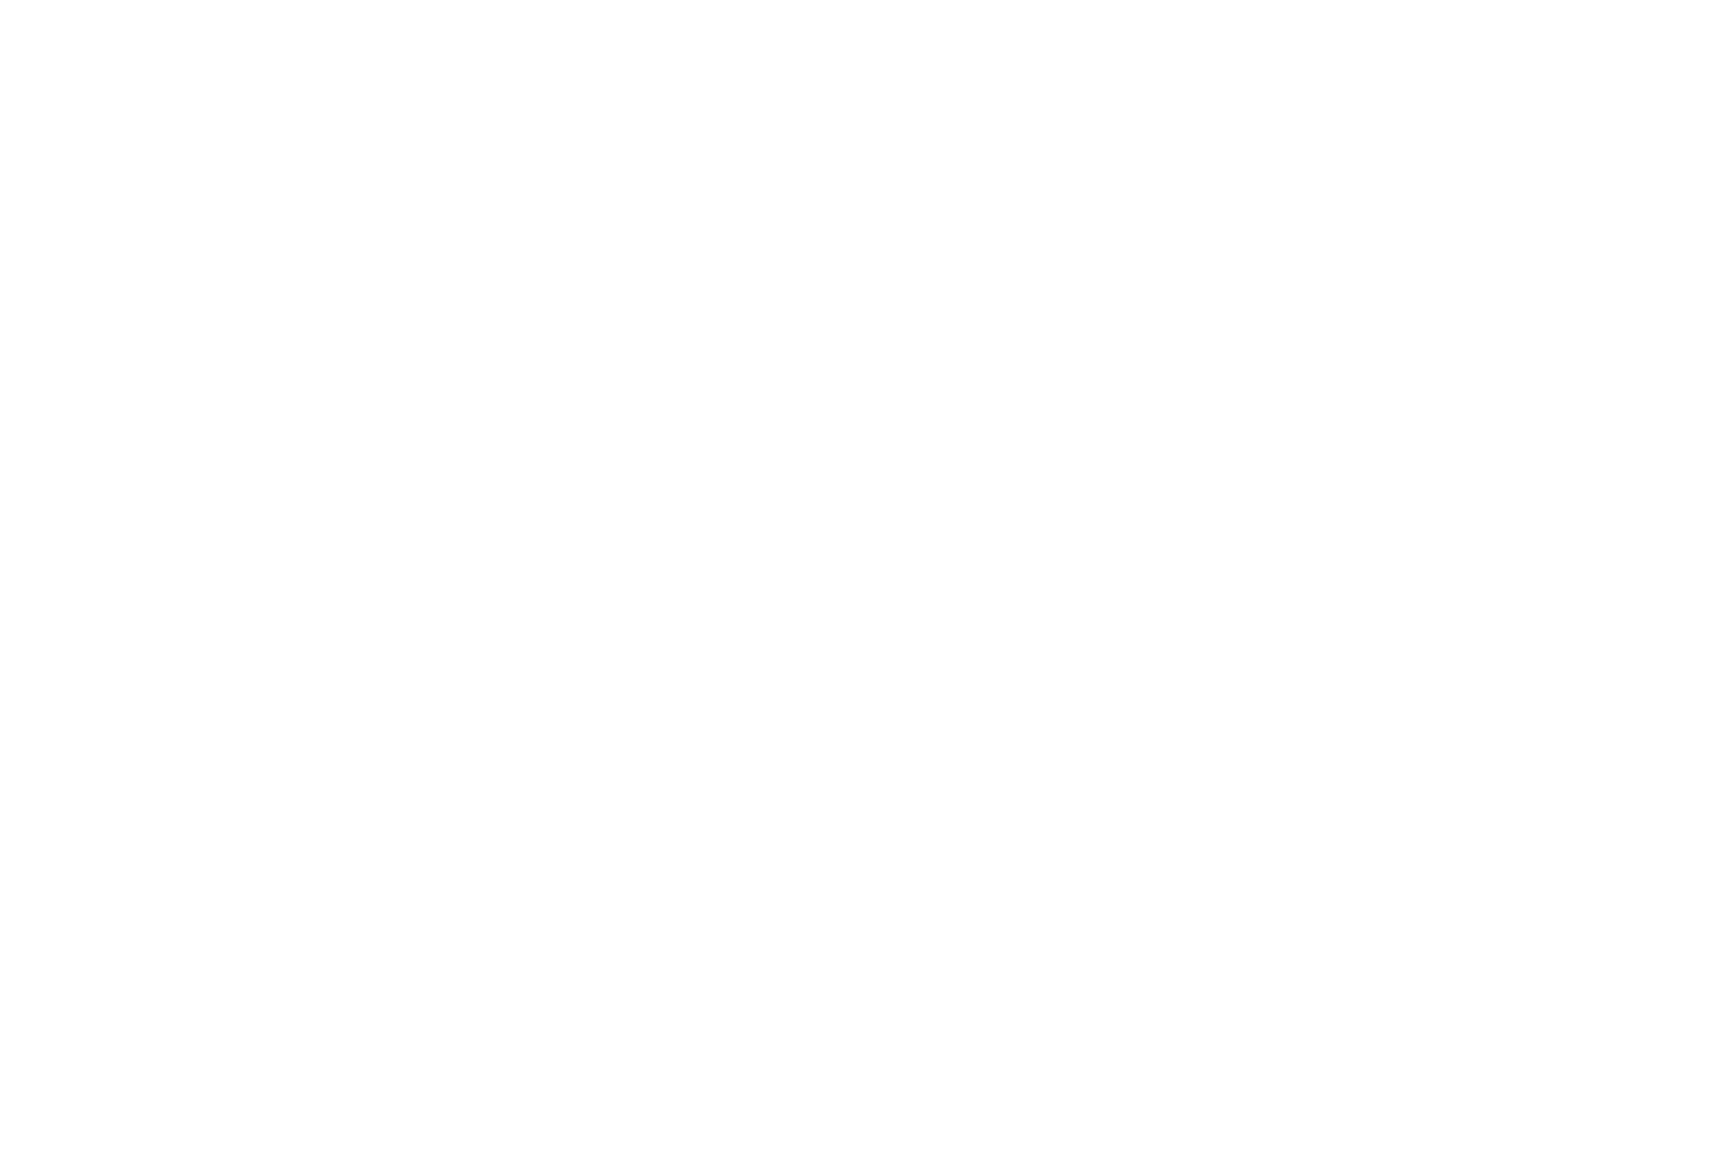

In [49]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [50]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


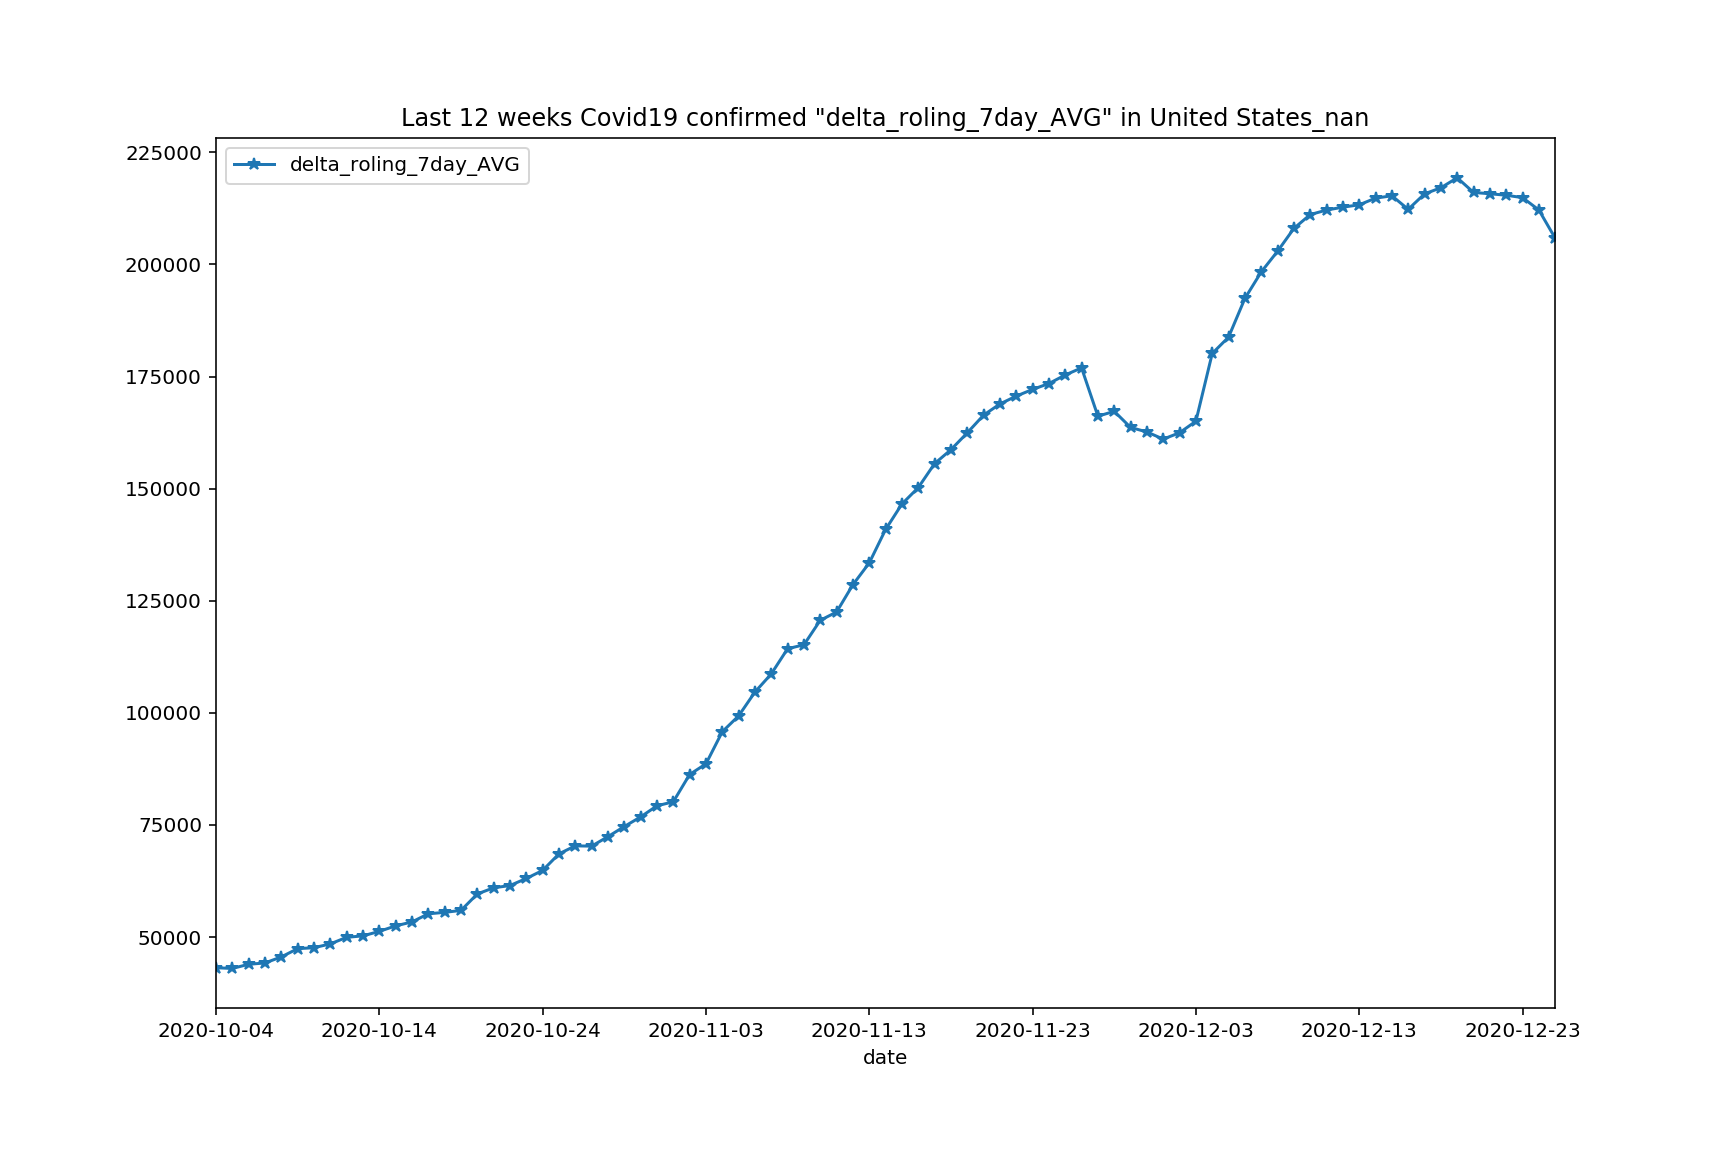

In [51]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


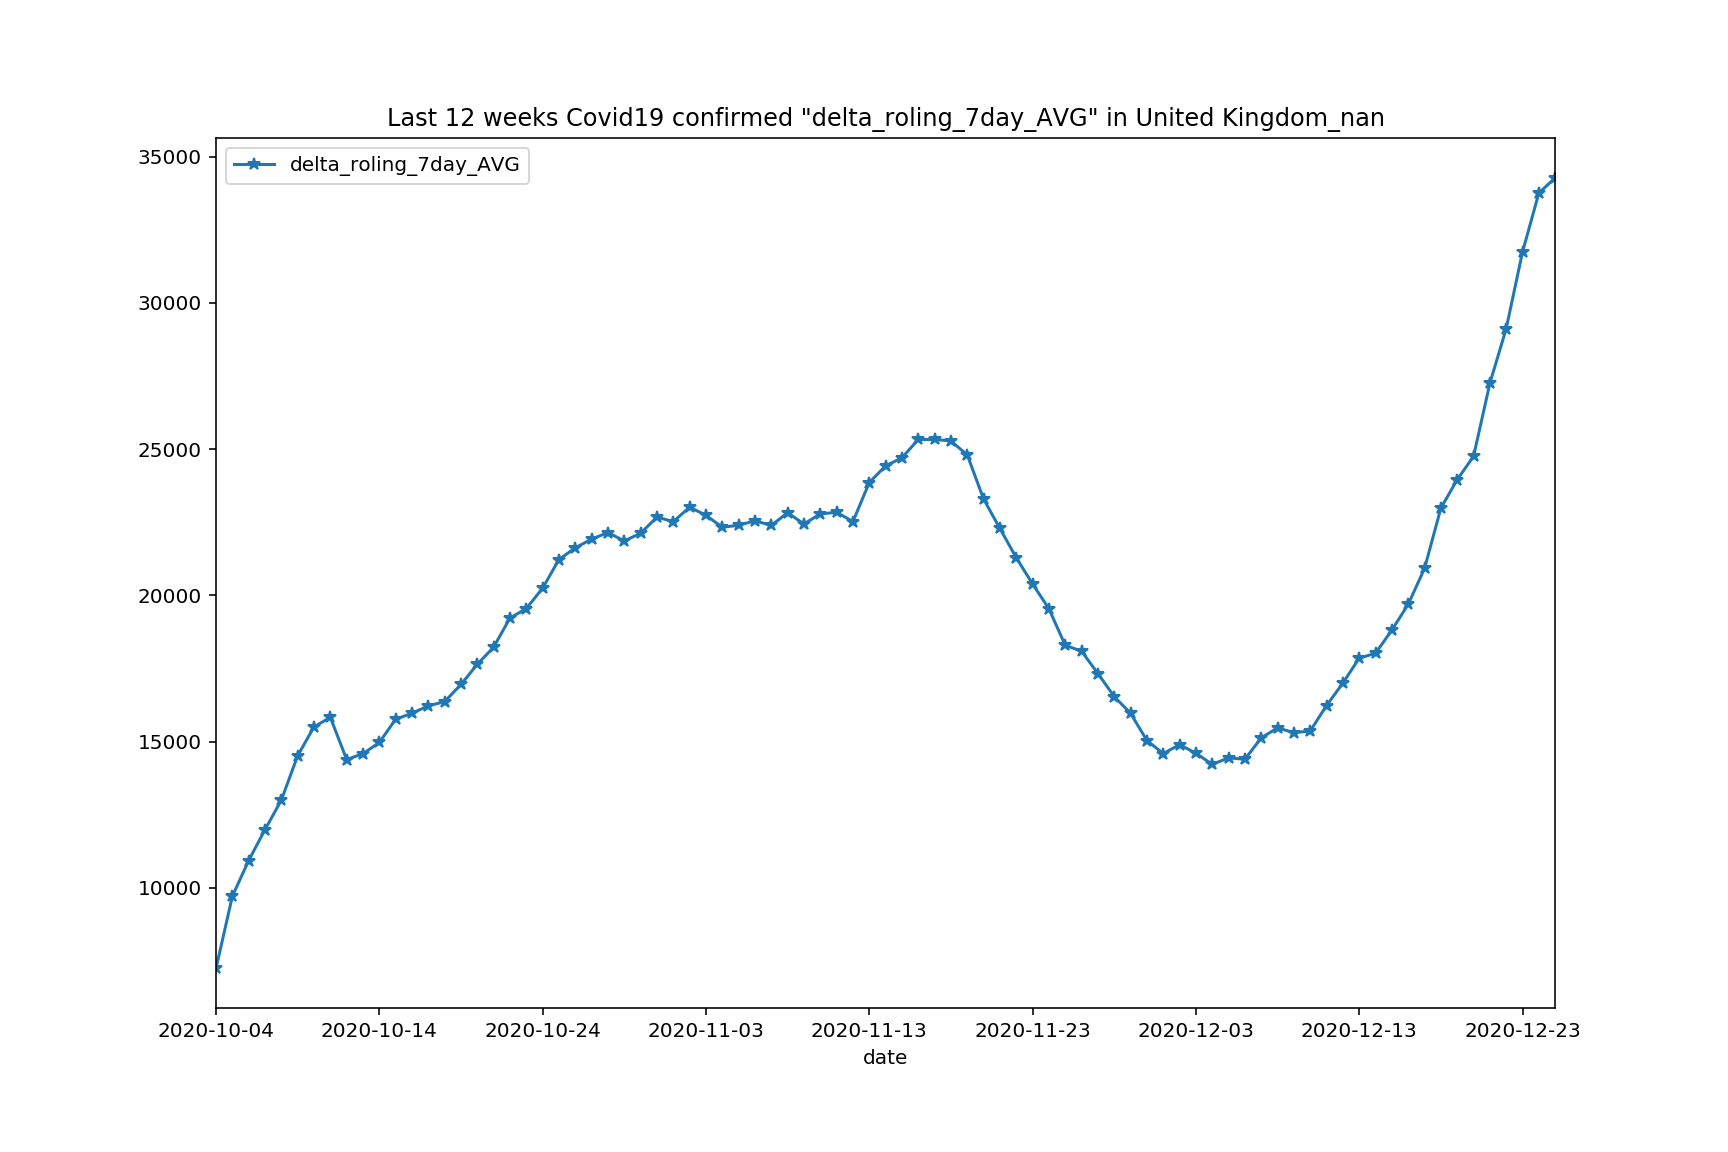

In [52]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


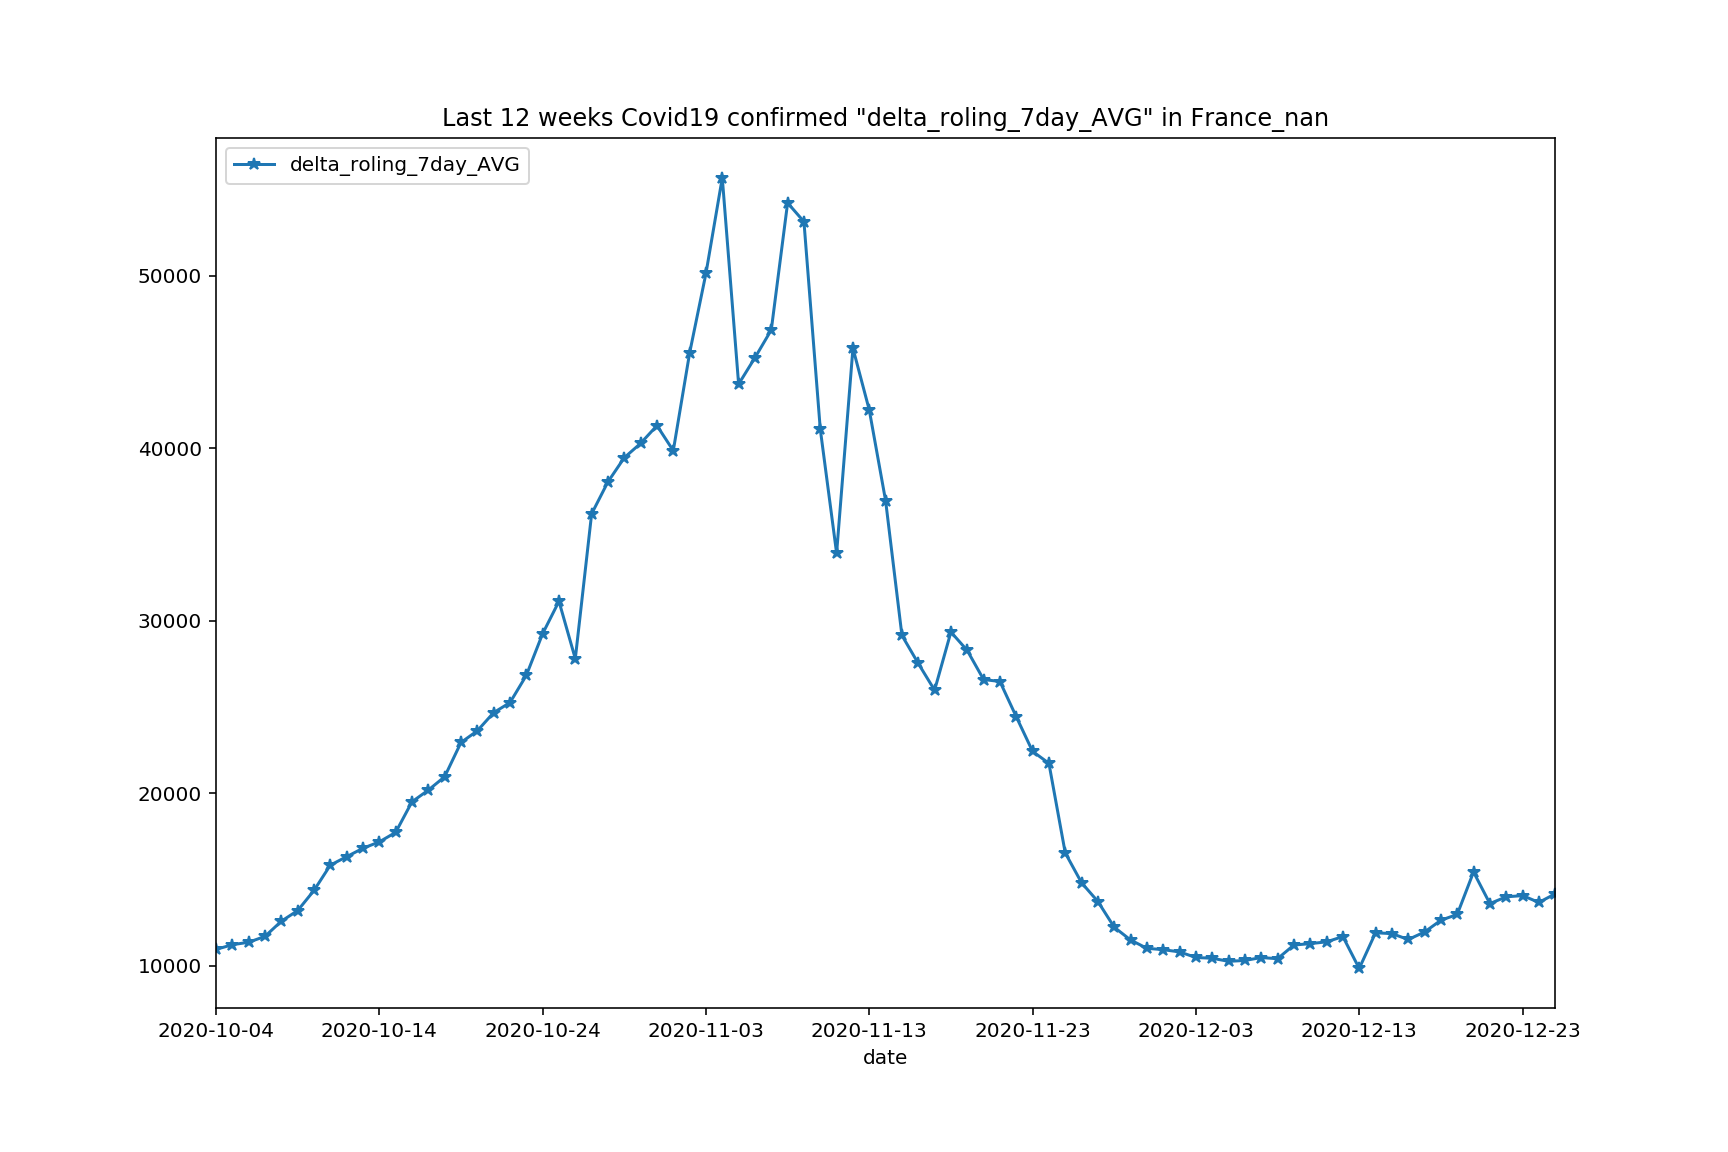

In [53]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


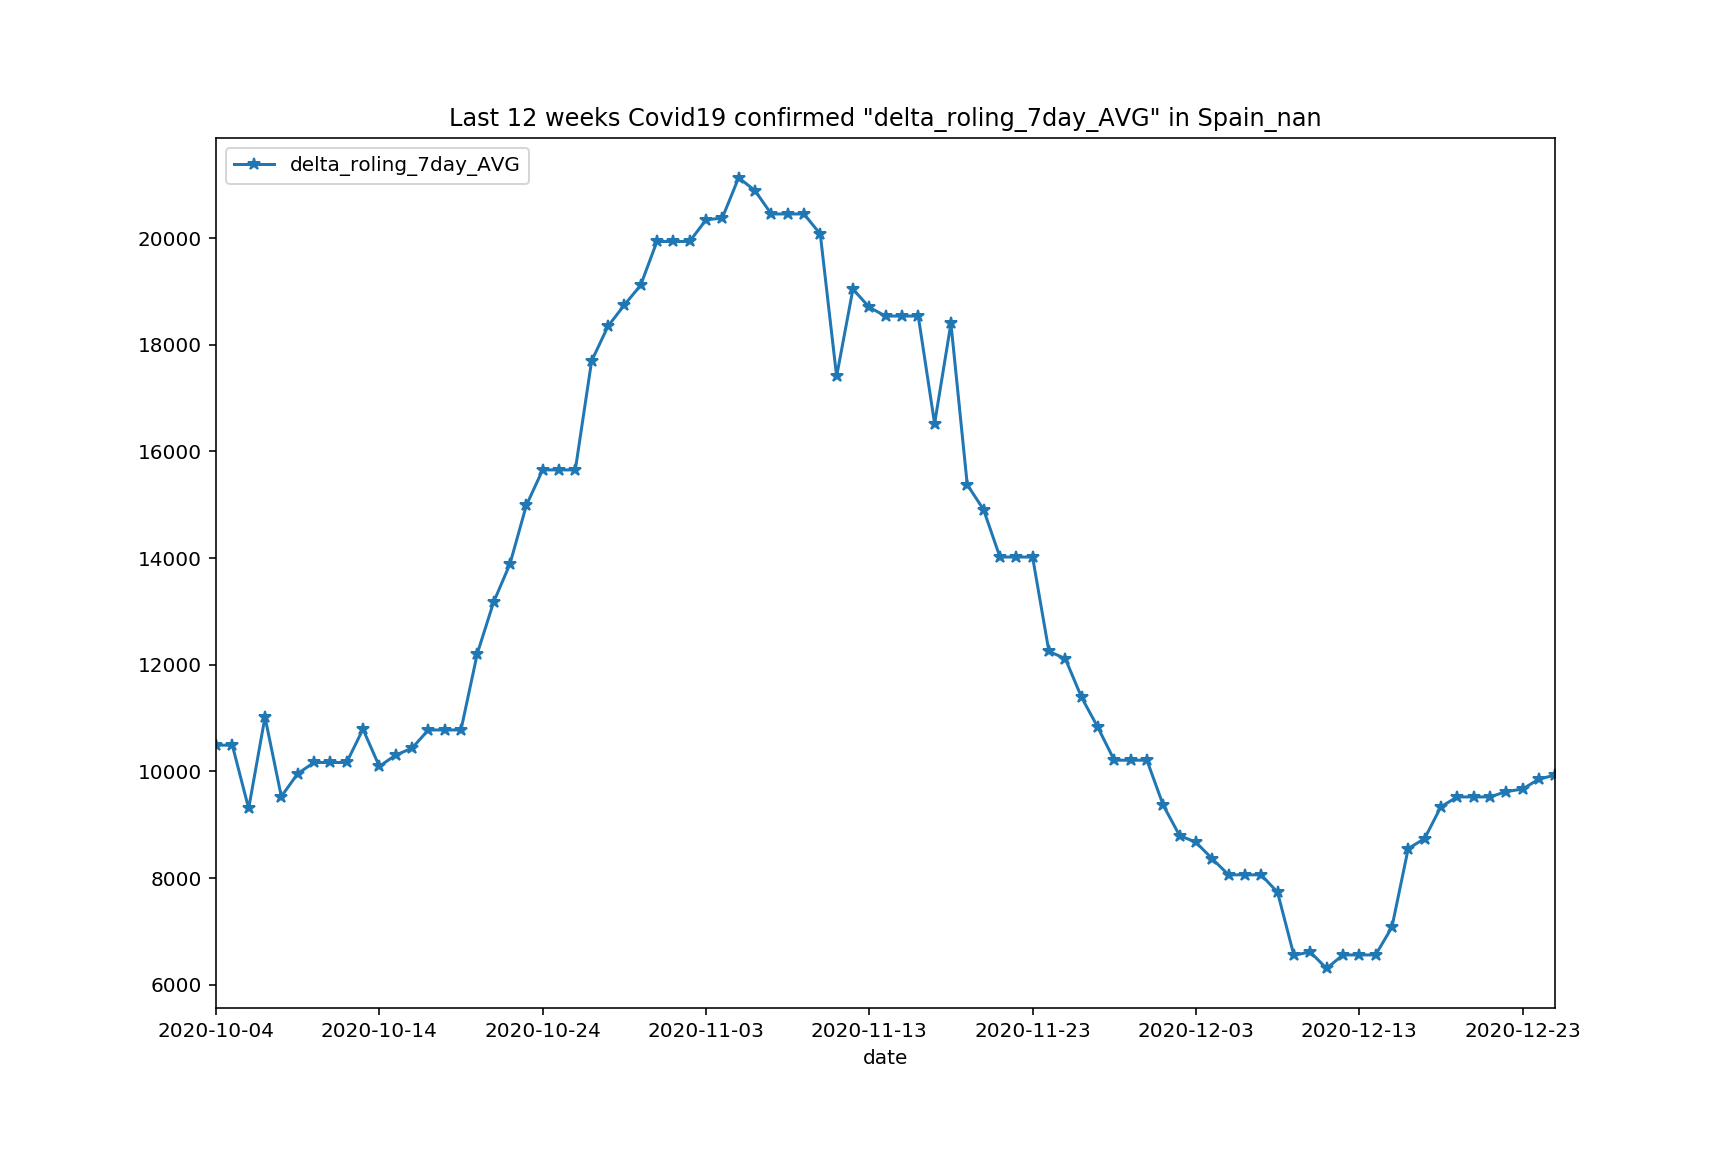

In [54]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


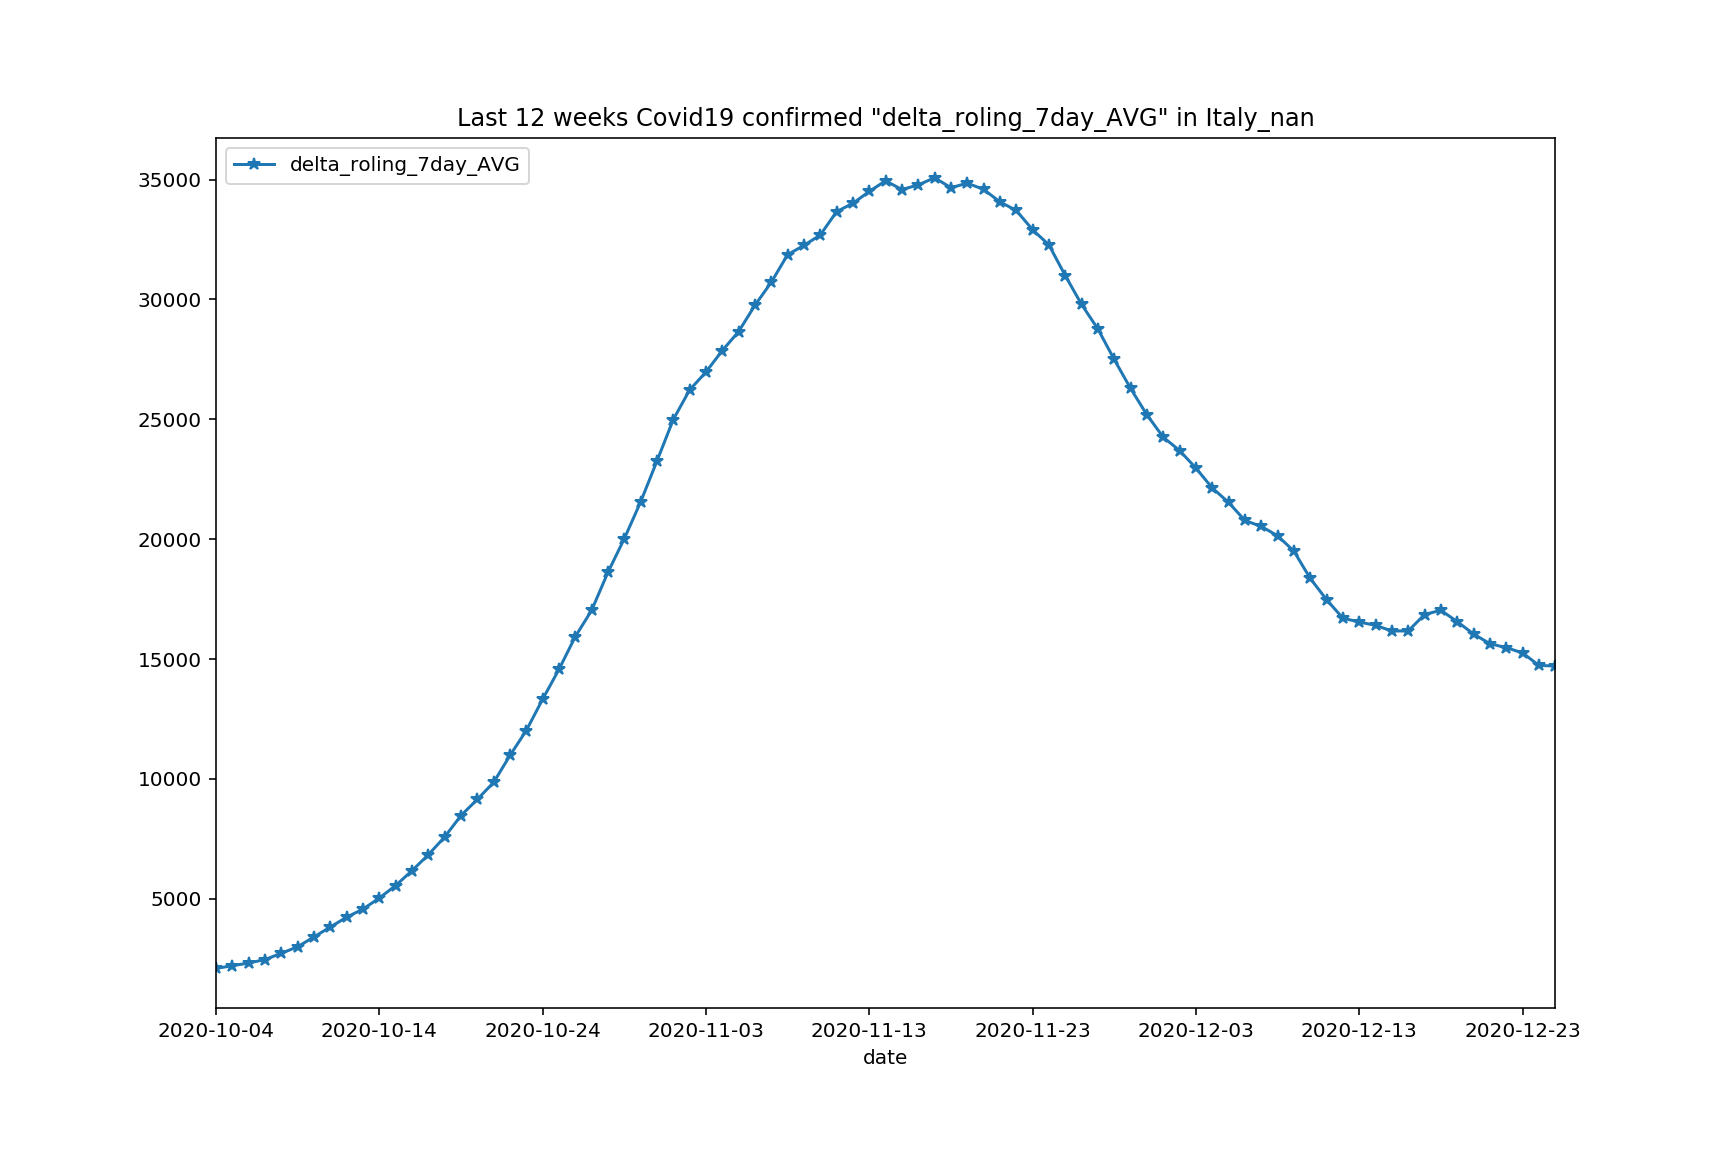

In [55]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


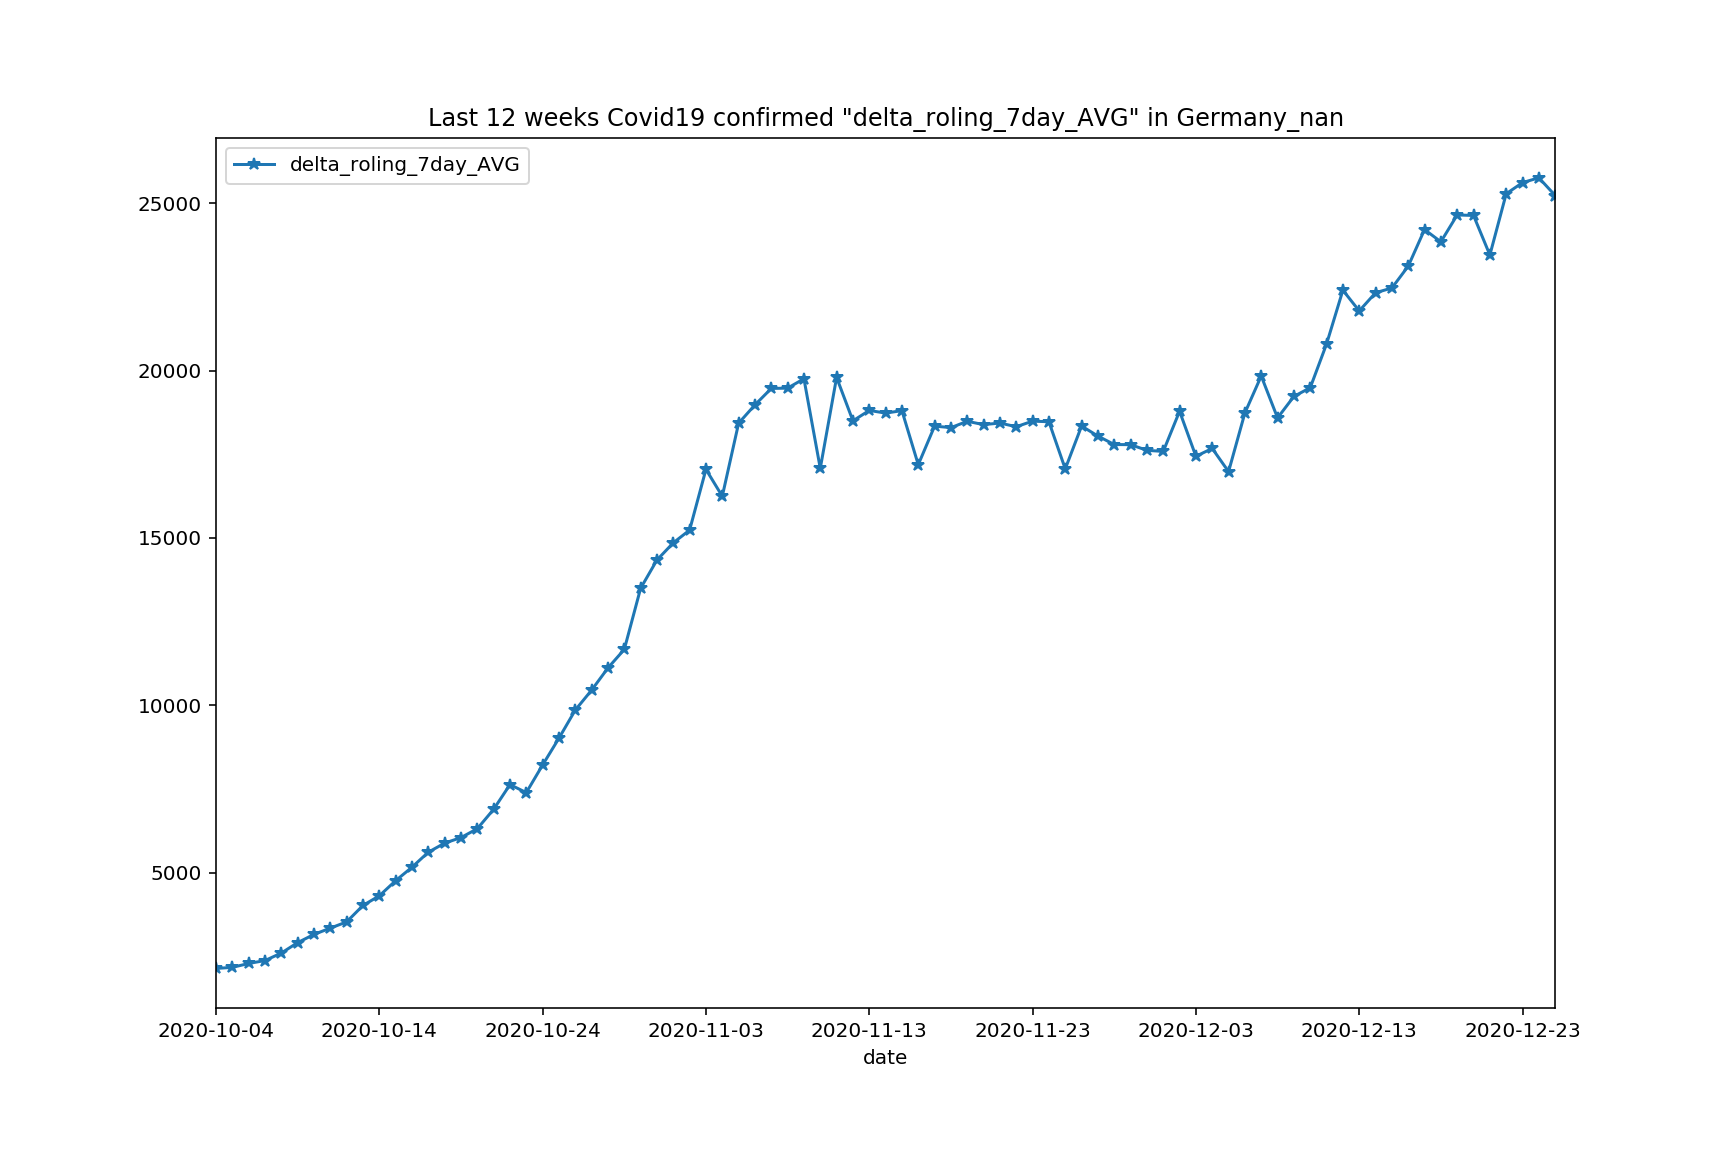

In [56]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


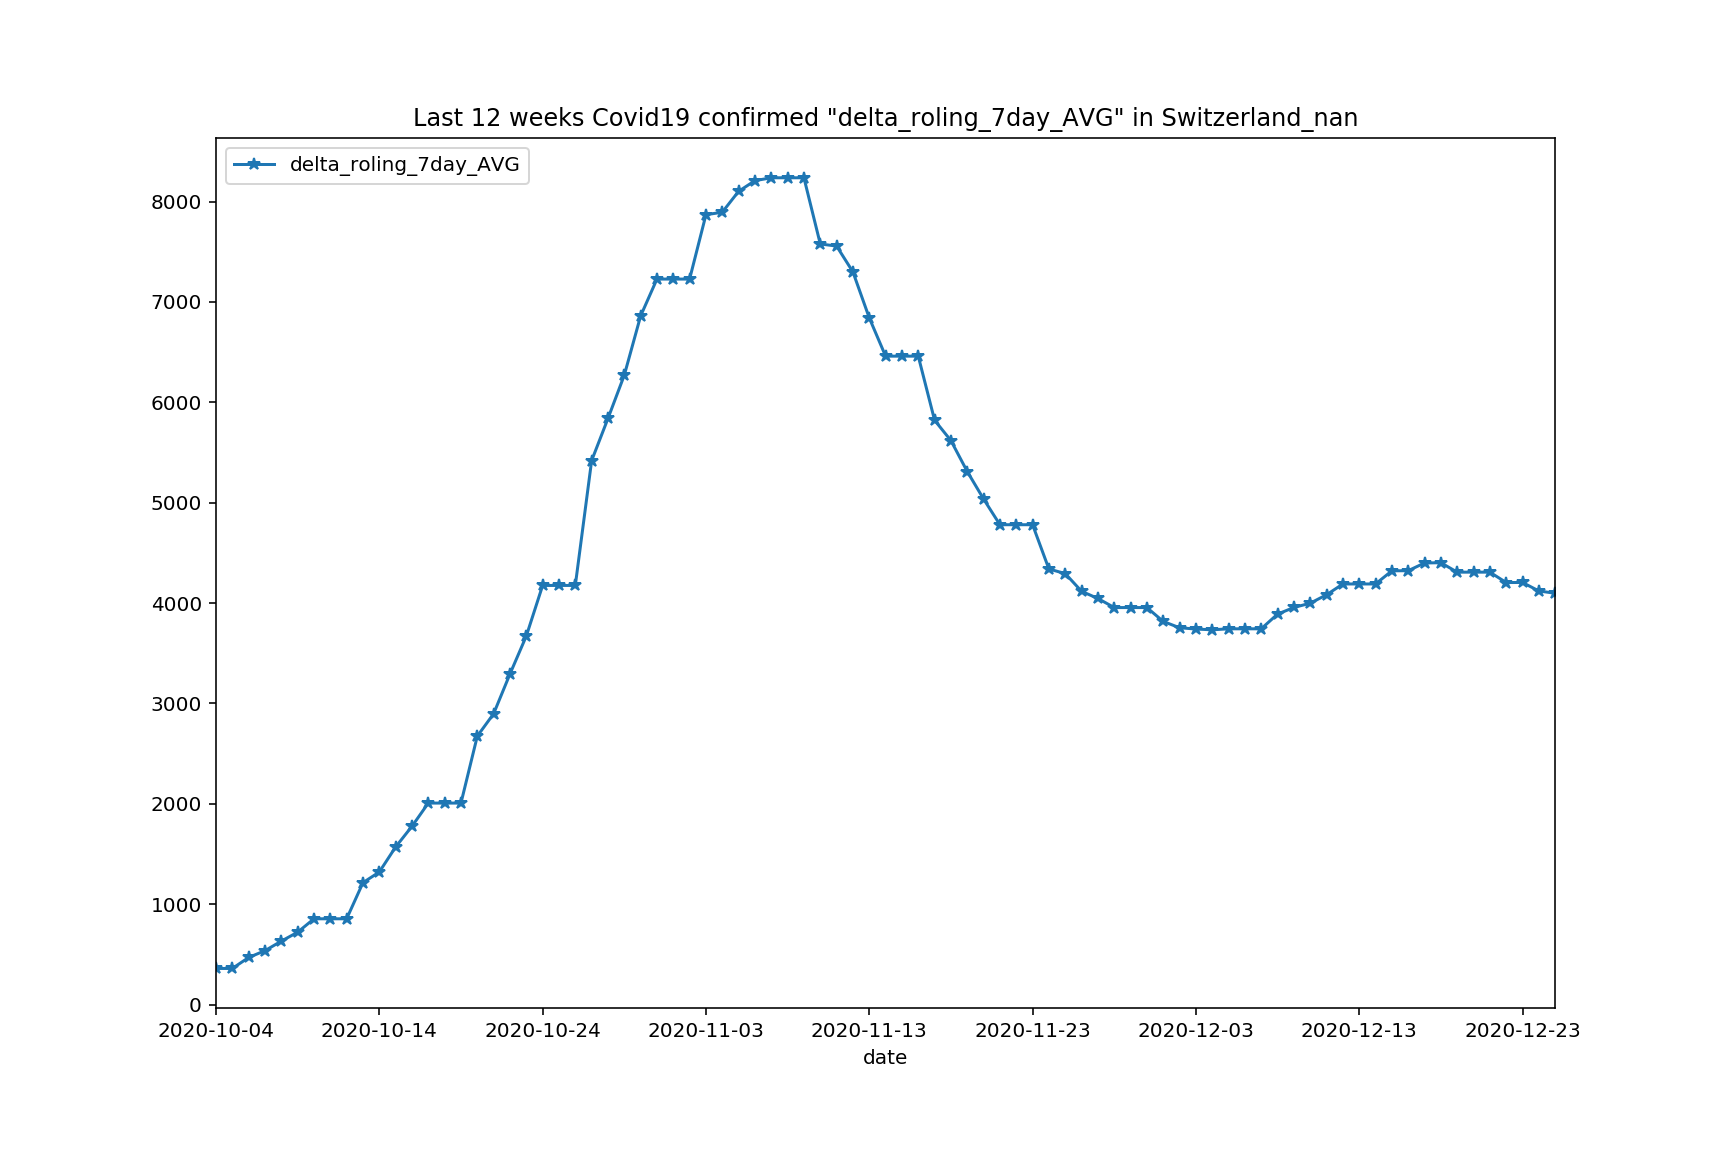

In [57]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


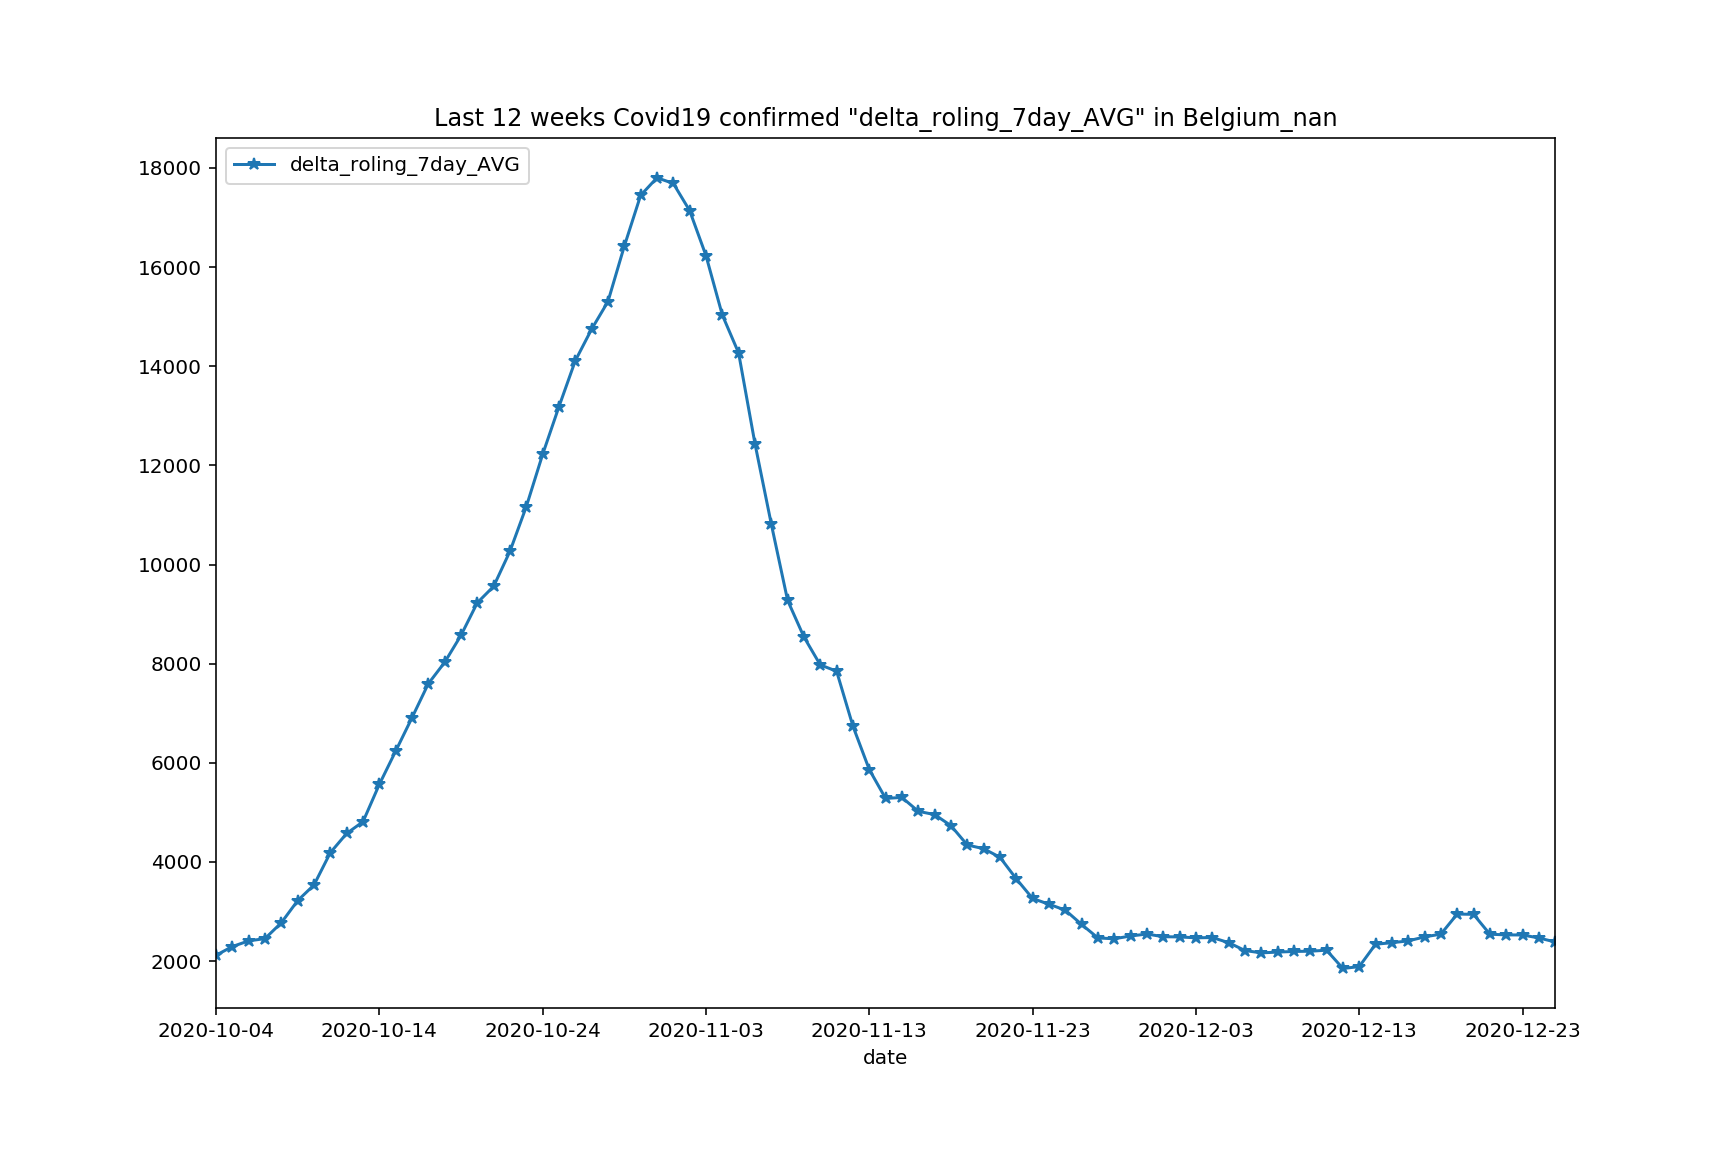

In [58]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


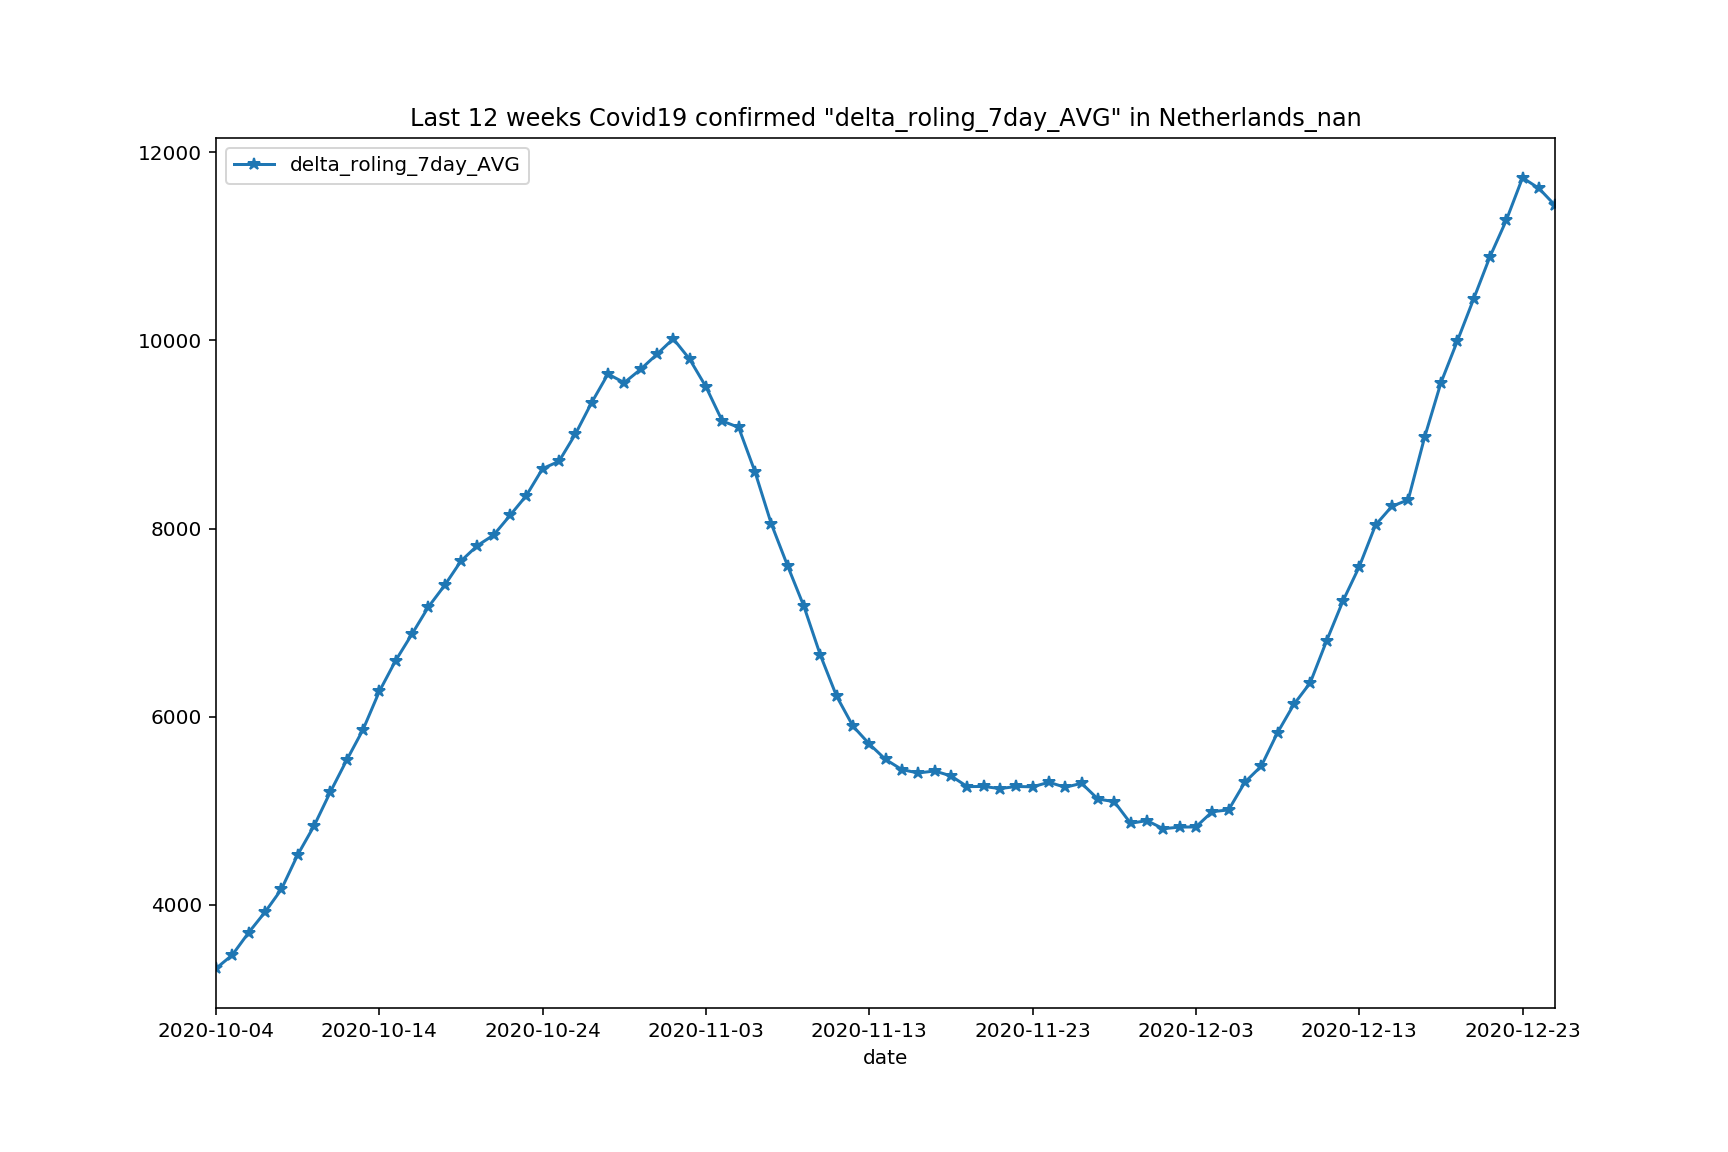

In [59]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


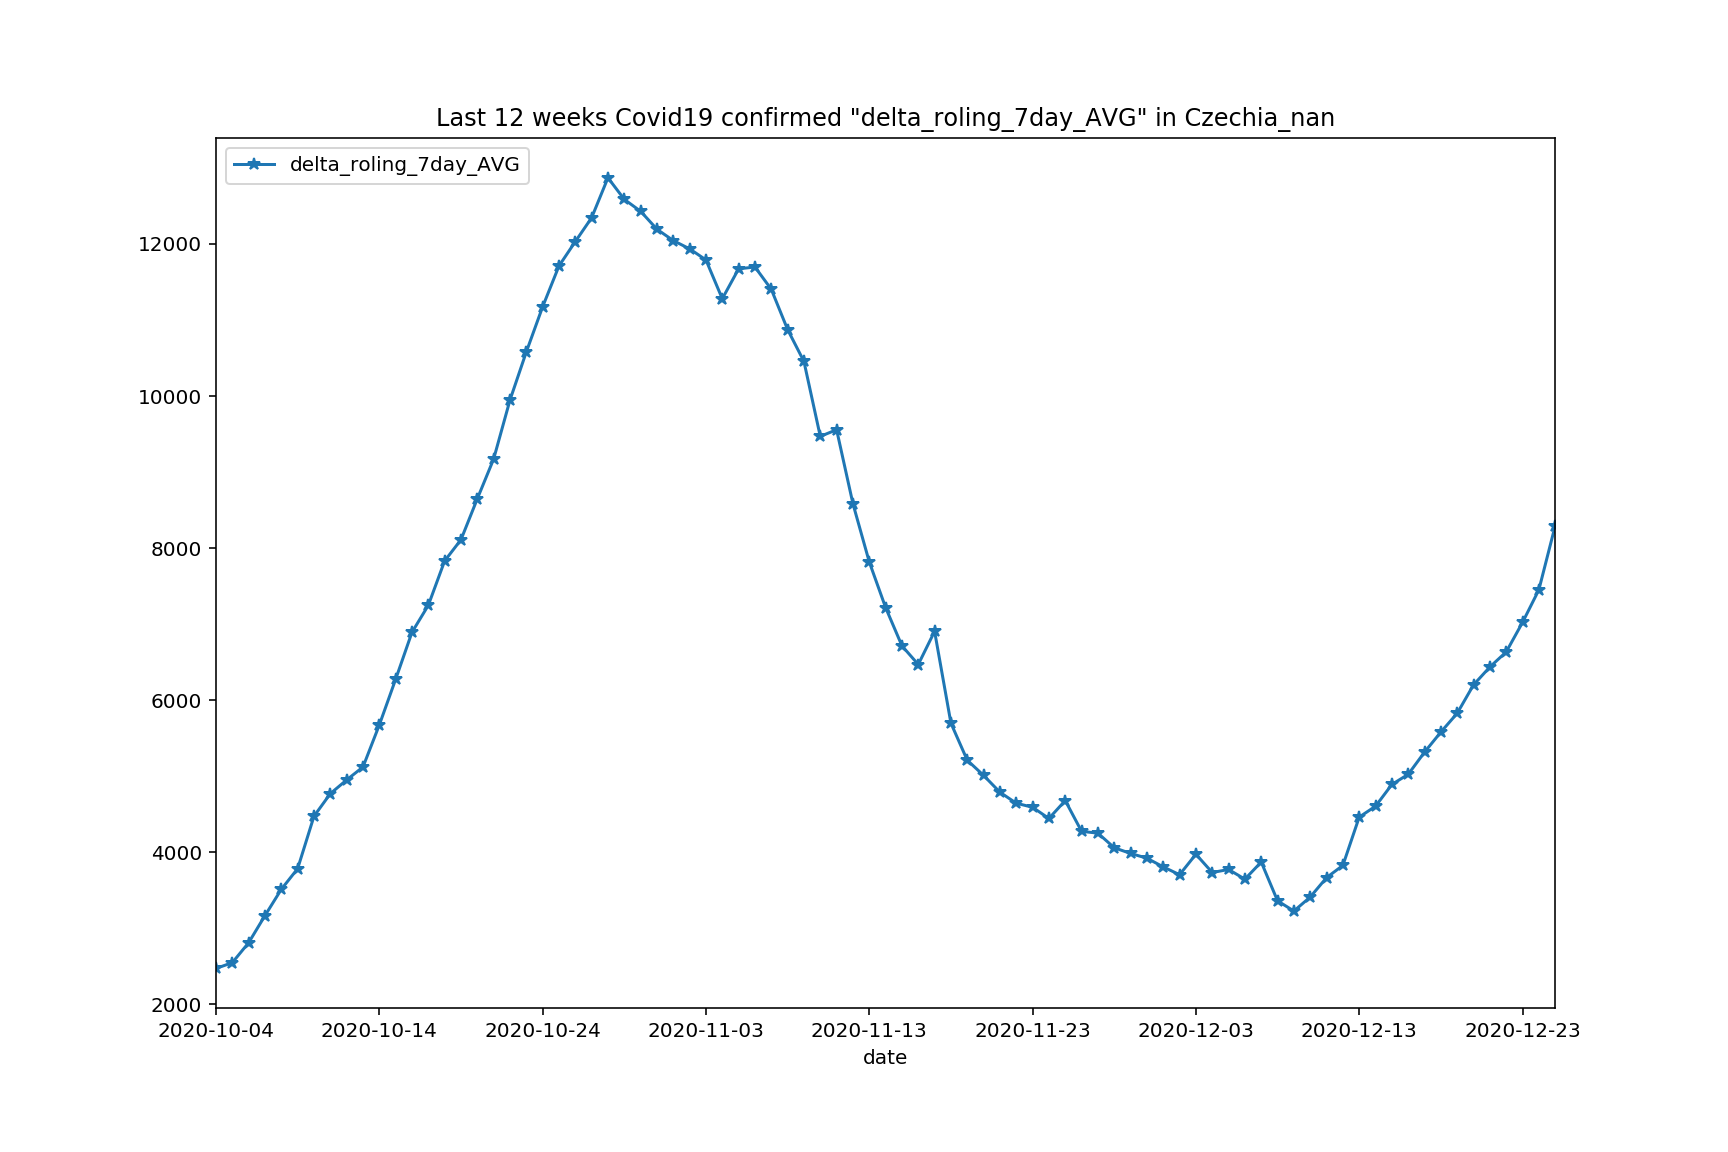

In [60]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


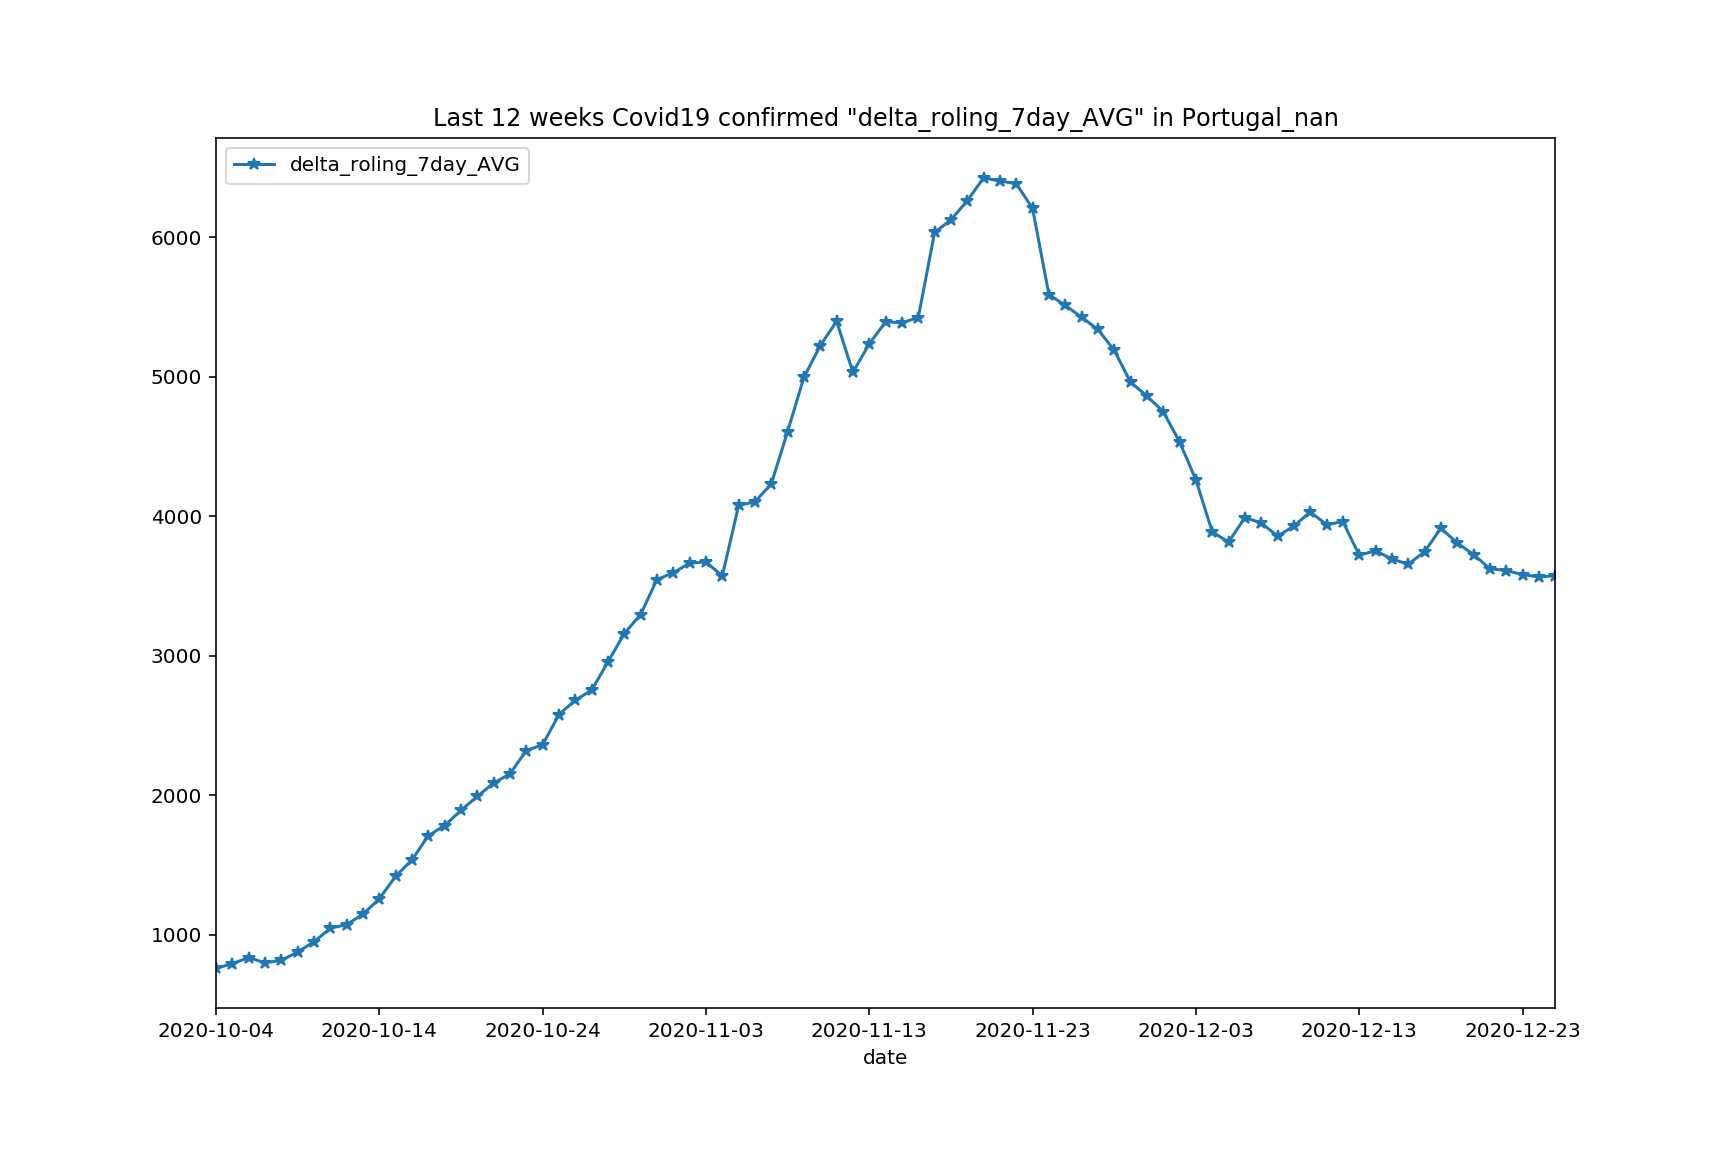

In [61]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 12 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [62]:
print("Validation Analysis 1day-Forecast and last 12 weeks evolution plot for: https://FuelBigData.com/blog is done!")

Validation Analysis 1day-Forecast and last 12 weeks evolution plot for: https://FuelBigData.com/blog is done!


In [63]:
exit()